<a href="https://colab.research.google.com/github/ilaria-carnevale/ai_engineering_professionai/blob/main/tree/main/Modulo3_Machine_LearningModello_previsione_per_mercato_immobiliare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Progetto Modulo 3 - Fondamenti di Machine Learning
##Un modello di previsione per il mercato immobiliare

RealEstateAI Solutions si propone di ottimizzare la valutazione dei prezzi immobiliari attraverso l'uso di tecniche avanzate di regolarizzazione in modelli di regressione lineare. L'obiettivo è fornire previsioni di prezzo più accurate e affidabili, riducendo il rischio di overfitting e migliorando la capacità di generalizzazione del modello.

Nel settore immobiliare, ottenere stime precise dei prezzi delle proprietà è cruciale per prendere decisioni informate. Tuttavia, i modelli di regressione lineare tradizionali possono soffrire di overfitting, compromettendo l'accuratezza delle previsioni. È necessario esplorare metodi di regolarizzazione efficaci per migliorare le performance predittive e gestire la complessità del modello.

Implementando e confrontando metodi di regolarizzazione come Lasso, Ridge e Elastic Net, RealEstateAI Solutions offrirà un sistema in grado di fornire previsioni di prezzo immobiliari più accurate e stabili. Questo permetterà agli agenti immobiliari e agli investitori di prendere decisioni basate su dati più affidabili, aumentando la loro competitività nel mercato.

**Requisiti del Progetto**:

1. **Preparazione del Dataset**:
> * Caricamento e preprocessamento dei dati sui prezzi immobiliari.
> * Gestione dei valori mancanti, codifica delle variabili categoriche e normalizzazione/scalatura dei dati.

2. **Implementazione dei Modelli di Regressione**:
> * **Ridge Regression**: Implementazione e addestramento del modello con regolarizzazione Ridge.
> * **Lasso Regression**: Implementazione e addestramento del modello con regolarizzazione Lasso.
> * **Elastic Net Regression**: Implementazione e addestramento del modello con regolarizzazione Elastic Net.

3. **Valutazione delle Performance**:
> * Utilizzo di tecniche di validazione incrociata.
> * Calcolo del Mean Squared Error (MSE) per ciascun modello.
> * Confronto della complessità dei modelli valutando il numero di coefficienti non nulli.
> * Analisi e confronto dei risultati dei vari metodi di regolarizzazione.

4. **Visualizzazione dei Risultati**:
> * Creazione di grafici per visualizzare e confrontare le performance dei modelli.
> * Visualizzazione della distribuzione dei residui per valutare l'adeguatezza del modello.

Il progetto deve includere il codice sorgente completo, con commenti dettagliati che spiegano i vari passaggi, le scelte fatte e i risultati ottenuti, per garantire trasparenza e replicabilità del lavoro.

#Il dataset
Il dataset è disponibile qui: https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv (liberamente tratto dal seguente dataset: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

> * **Price**: il prezzo, il target da prevedere
> * **Area**: superficie dell’immobile
> * **Bedrooms**: numero di camere da letto
> * **Bathrooms**: numero di bagni
> * **Stories**: numero di piani
> * **Mainroad**: vale 1 se l’immobile affaccia su una strada principale, 0 altrimenti
> * **guestroom**: vale 1 se l’immobile ha una stanza degli ospiti, 0 altrimenti
> * **basement**: vale 1 se l’immobile ha un seminterrato, 0 altrimenti
> * **hotwaterheating**: vale 1 se l’immobile ha una caldaia, 0 altrimenti
> * **airconditioning**: vale 1 se l’immobile ha l’aria condizionata, 0 altrimenti
> * **parking**: numero di parcheggi
> * **prefarea**: vale 1 se l’immobile è in una zona prestigiosa, 0 altrimenti
> * **Furnishingstatus**: vale 0 se l’immobile non è arredato, 1 se è parzialmente arredato, 2 se è completamente arredato

# <font color= "#84B19C"> Installazione moduli e librerie </font>

Vengono importate le librerie e moduli Python utilizzati per l'analisi dei dati e il machine learning:
* <font color= "#84B19C"> **pandas**</font>: libreria per la manipolazione e l'analisi dei dati strutturati
* <font color= "#84B19C"> **numpy**</font>: libreria per il calcolo numerico e operazioni su array
* <font color= "#84B19C"> **sklearn.model_selection**</font> (metodo train_test_split): metodo per dividere il dataset in training e test set
* <font color= "#84B19C"> **sklearn.preprocessing**</font> (classe StandardScaler): classe per la standardizzazione delle feature
* <font color= "#84B19C"> **matplotlib.pyplot**</font>: libreria per la creazione di grafici e visualizzazione dei dati
* <font color= "#84B19C"> **seaborn**</font>: libreria basata su matplotlib per visualizzazioni statistiche
* <font color= "#84B19C"> **sklearn.linear_model**</font> (classe LinearRegression): classe per implementazione di modelli di regressione lineare
* <font color= "#84B19C"> **sklearn.linear_model**</font> (classi Ridge, Lasso, ElasticNet): classi per implementazione di modelli con regolarizzazione L2, L1 e L1+L2
* <font color= "#84B19C"> **sklearn.metrics**</font> (metodi mean_squared_error, mean_absolute_error, r2_score): metriche per valutare le prestazioni dei modelli
* <font color= "#84B19C"> **sklearn.model_selection**</font> (classe GridSearchCV): classe per ottimizzazione di iperparametri tramite cross-validation
* <font color= "#84B19C"> **sklearn.model_selection**</font> (classe KFold): classe per ottimizzazione dei modelli con cross-validation
* <font color= "#84B19C"> **sklearn.model_selection** </font> (metodo learning_curve): metodo per generare curve di apprendimento sulle prestazioni dei modelli al variare della dimensione del training set

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve

# <font color= "#84B19C"> Caricamento e analisi dati (EDA)</font>

##<font color= "#84B19C"> Caricamento dei dati </font>

Per importare il dataset viene utilizzata la libreria Pandas, per caricare il file CSV da un URL remoto. Il dataset viene letto tramite il metodo `read_csv()` e memorizzato in un DataFrame. Dopo il caricamento, viene utilizzato il metodo `head()` per visualizzare le prime 5 righe del dataset, ottenendo una panoramica iniziale sulla struttura dei dati e sulla corretta importazione. Successivamente vengono utilizzati i metodi `info()` e `describe()` per ottenere informazioni sul tipo di dato per ciascuna variabile e sulla loro distribuzione statistica. Questo passaggio è utile per comprendere le caratteristiche del dataset prima di procedere con ulteriori fasi di analisi e preprocessing.

In [ ]:
#url contenete il dataset housing.csv
DATASET = "https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv"
#leggiamo il dataset con pandas
housing = pd.read_csv(DATASET)
#mostriamo i primi 10 risultati con pandas
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [ ]:
#verifichiamo la tipologia di ogni variabile
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [ ]:
#verifichiamo la distribuzione delle variabili tramite analisi statistica
housing.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


## <font color= "#84B19C"> Matrice di correlazione </font>

Per analizzare le relazioni tra le variabili del dataset e identificare eventuali correlazioni con il target (price), viene creata una <font color= "#84B19C"> **matrice di correlazione** </font> utilizzando le librerie Seaborn e Matplotlib. La matrice di correlazione permette di individuare e valutare possibili relazioni tra le feature, sia rispetto al target che tra di loro. Questo passaggio è utile per individuare le variabili più informative e rilevare eventuali problemi di collinearità. I colori della mappa impostata con `cmap="coolwarm"` possono essere interpretati nel modo seguente:
> <font color= "#FF4500"> Rosso intenso </font> → Correlazione positiva forte (vicina a +1).<br>
> <font color= "4169E1"> Blu intenso </font> → Correlazione negativa forte (vicina a -1).<br>
> Bianco → Nessuna correlazione (vicino a 0).

Il codice nello specifico:
1. Calcola i coefficienti di correlazione tra tutte le coppie di variabili con il metodo `corr()` sul dataset.
2. Visualizza la matrice di correlazione con il metodo `heatmap()` di Seaborn, con annotazioni numeriche e una mappa di colori per facilitare l'interpretazione.

Dall'analisi della matrice di correlazione emergono le seguenti osservazioni:

1. Feature con correlazione più alta con il target (price):
> * <font color= "#84B19C">**area**</font>: correlazione di 0.54.
> * <font color= "#84B19C">**bathrooms**</font>: correlazione di 0.52.
> * <font color= "#84B19C">**airconditioning**</font>: correlazione di 0.45.
> * <font color= "#84B19C">**stories**</font>: correlazione di 0.42.
> * <font color= "#84B19C">**parking**</font>: correlazione di 0.38.
> * <font color= "#84B19C">**bedrooms**</font>: correlazione di 0.37.

2. Feature con correlazione moderata tra loro (collinearità contenuta):
> * <font color= "#84B19C">**bedrooms e bathrooms**</font>: correlazione di 0.37.
> * <font color= "#84B19C">**bedrooms e stories**</font>: correlazione di 0.41.
> * <font color= "#84B19C">**guestroom e basement**</font>: correlazione di 0.37.
> * <font color= "#84B19C">**area e parking**</font>: correlazione di 0.35.

3. Feature con correlazione negativa tra loro:
> * <font color= "#84B19C">**basement e stories**</font>: correlazione di -0.17.
> * <font color= "#84B19C">**hotwaterheating e airconditioning**</font>: correlazione di -0.13.

4. Feature con correlazione bassa con il target (meno informative):
> * <font color= "#84B19C">**hotwaterheating**</font>: correlazione di 0.093.
> * <font color= "#84B19C">**basement**</font>: correlazione di 0.19.
> * <font color= "#84B19C"> **furnishingstatus**</font>: correlazione di 0.19.

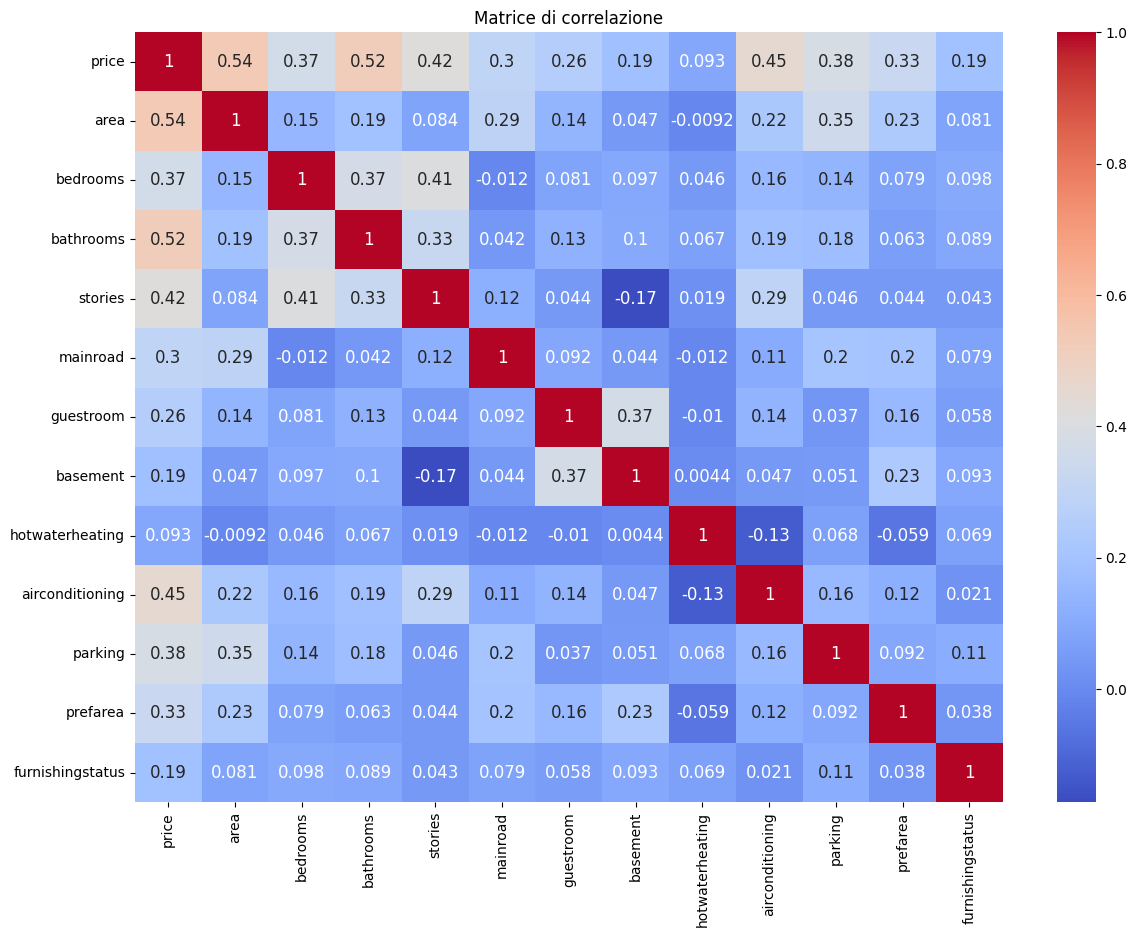

In [ ]:
#calcoliamo la matrice di correlazione
corr_matrix = housing.corr()

#impostiamo le dimensioni della figura
plt.figure(figsize=(14,10))
#visualizziamo matrice di correlazione con funzione heatmap di seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", annot_kws={"size":12})
plt.title("Matrice di correlazione")
plt.show()

##<font color= "#84B19C"> Tipologia di relazione lineare </font>

Per analizzare la <font color= "#84B19C">**relazione lineare**</font> tra le feature numeriche e il target vengono generati degli scatterplot con linea di regressione. Gli scatterplot permettono di visualizzare l'andamento delle variabili indipendenti rispetto al target, facilitando l'identificazione di pattern lineari. Il codice nello specifico:
1. Imposta le dimensioni delle figure con il metodo `figure()` (altezza, larghezza).
2. Itera sulle feature numeriche, creando uno scatterplot con linea di regressione per ciascuna variabile rispetto al target.
3. Utilizza il metodo `regplot()` di Seaborn per visualizzare la relazione, includendo una linea di regressione rossa per evidenziare l'andamento.
4. Aggiunge titoli ed etichette per facilitare l'interpretazione.
5. Evita sovrapposizioni tra i grafici con il metodo `tight_layout()`.
6. Mostra gli scatterplot risultanti.

Dai grafici risultanti emerge un andamento prevalentemente <font color= "#84B19C">**lineare semplice**</font>: la linea di regressione mostra una tendenza crescente per tutte le feature numeriche considerate, ovvero all'incremento delle feature corrisponde generalmente un incremento del target. Pertanto, un modello di regressione lineare semplice risulta essere ottimale per descrivere queste relazioni.

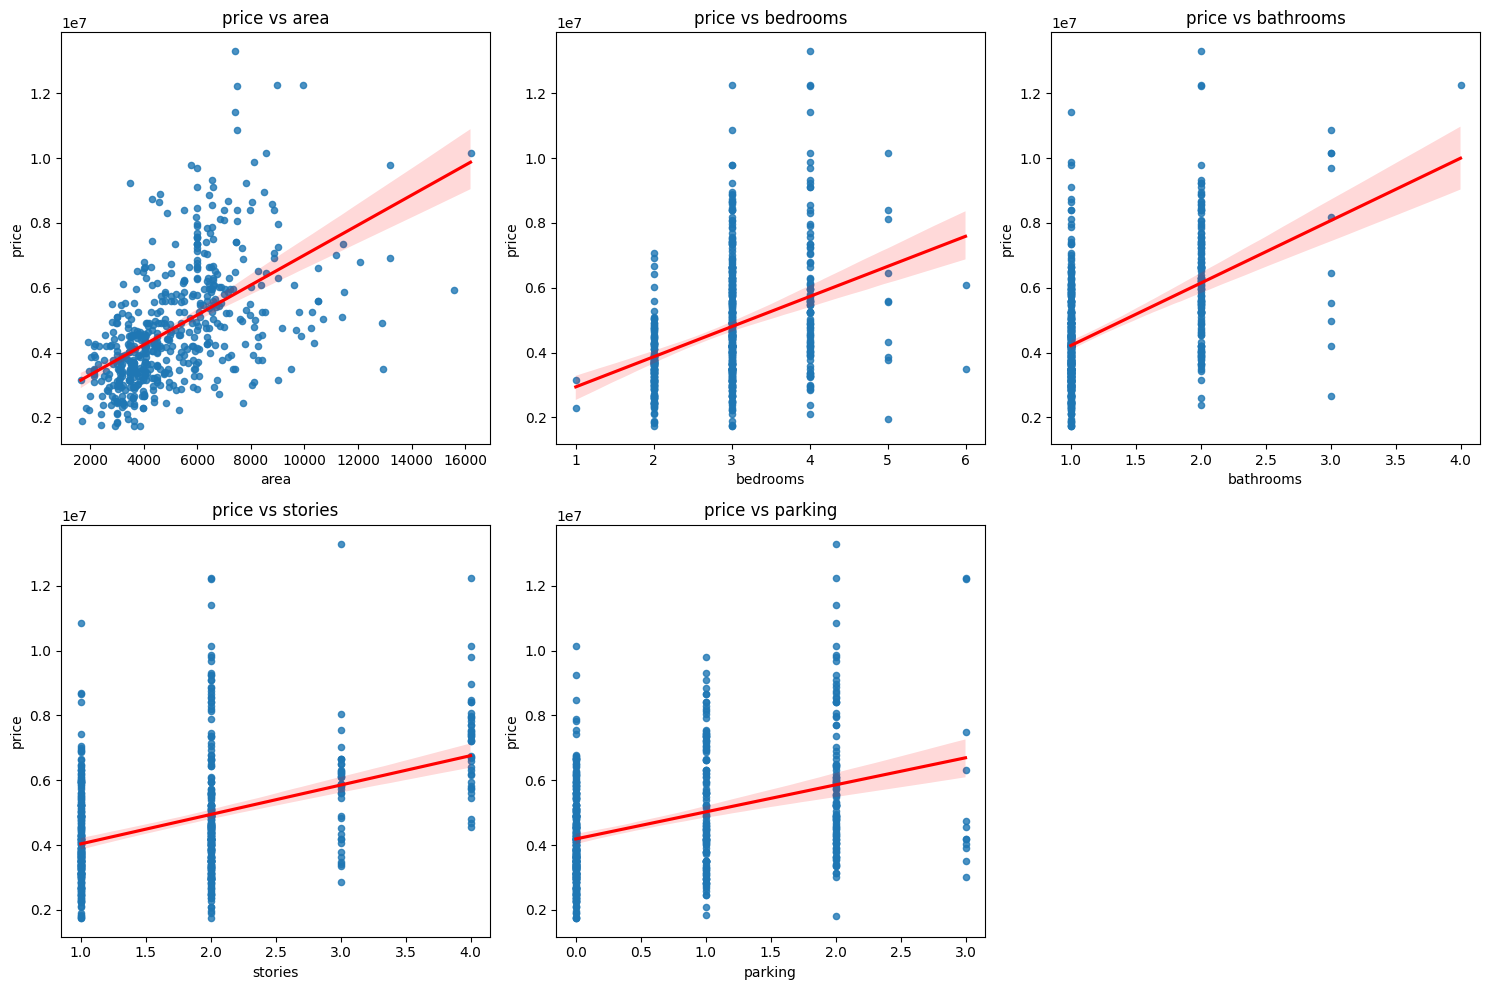

In [ ]:
#verifichiamo tipologia di regressione lineare per variabili numeriche
def plot_scatterplots(dataset, features, target):
  #impostiamo dimensioni della figura
  plt.figure(figsize=(15, 10))

  #iteriamo sulle colonne per creare i boxplot
  for i, feature in enumerate(features, 1):
    #creiamo subplot per ogni feature
    plt.subplot(2, 3, i)
    #visualizziamo andamento regressione+linea rossa
    sns.regplot(x=dataset[feature], y=dataset[target], scatter_kws={"s": 20}, line_kws={"color": "red"})
    plt.title(f'{target} vs {feature}')
    plt.xlabel(feature)
    plt.ylabel(target)
  #mostriamo subplot evitando sovrapposizioni
  plt.tight_layout()
  plt.show()

#selezioniamo feature numeriche
numeric_features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
plot_scatterplots(housing, numeric_features, "price")

##<font color= "#84B19C"> Analisi degli outlier </font>

Per individuare eventuali <font color= "#84B19C">**outlier**</font> che potrebbero influenzare negativamente le prestazioni del modello vengono generati i boxplot delle feature numeriche. I boxplot rappresentano la distribuzione di dati tramite i quartili, permettendo di identificare rapidamente la presenza di valori anomali e analizzare la variabilità delle diverse feature. Il codice nello specifico:
1. Imposta le dimensioni delle figure con il metodo `figure()` (altezza, larghezza).
2. Itera sulle feature numeriche, creando un boxplot per ciascuna variabile.
3. Utilizza il metodo `boxplot()` di Seaborn per visualizzare la distribuzione dei dati e i potenziali outlier.
3. Aggiunge titoli ed etichette per facilitare l'interpretazione.
4. Evita sovrapposizioni tra i grafici con il metodo `tight_layout()`.
5. Mostra i boxplot risultanti.

Dai grafici risultanti emergono alcuni valori anomali, con le feature price e area che presentano il maggior numero di outlier. I valori estremi per queste feature potrebbero impattare sulle prestazioni del modello e verranno gestiti in fase di preprocessing tramite trasformazione logaritmica.

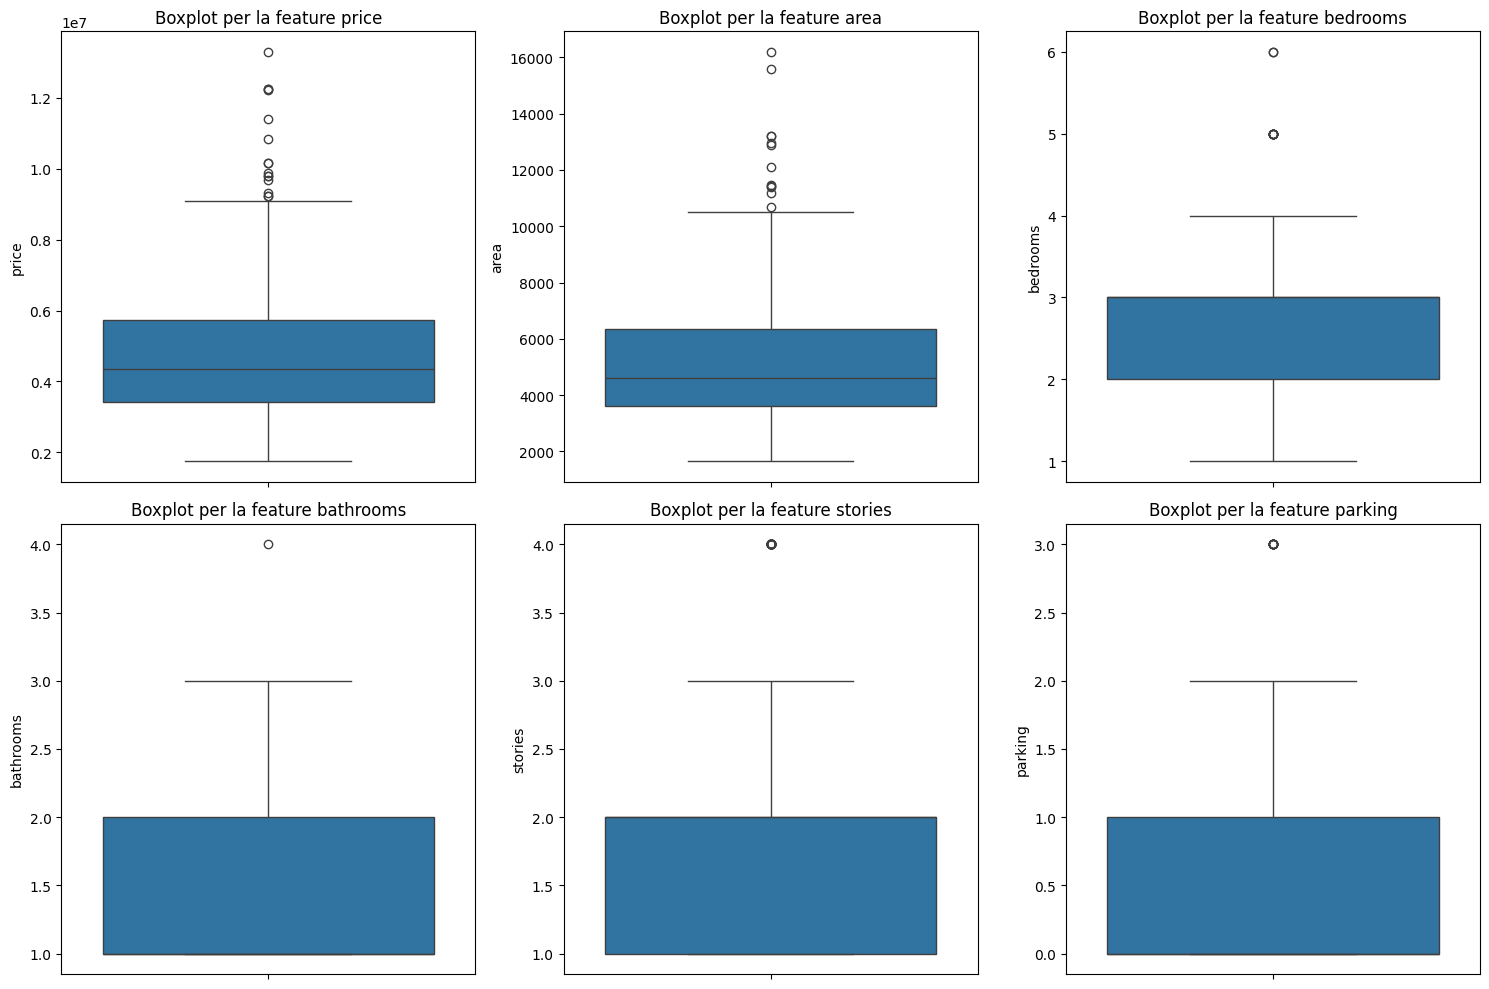

In [ ]:
def plot_boxplots(dataset, columns):
    #impostiamo dimensioni della figura
    plt.figure(figsize=(15, 10))

    #iteriamo sulle colonne per creare i boxplot
    for i, col in enumerate(columns):
        #creiamo subplot per ogni feature (su 2 righe 3 colonne)
        plt.subplot(2, 3, i+1) #plt.subplots() sono 6
        #creiamo boxplot verticale per la colonna corrente
        sns.boxplot(y=dataset[col])
        plt.ylabel(col) #etichetta asse y
        plt.title(f"Boxplot per la feature {col}")

    #mostriamo subplot evitando sovrapposizioni
    plt.tight_layout()
    plt.show()

#visualizziamo boxplot per le feature numeriche
numeric_features = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]
plot_boxplots(housing, numeric_features)

#<font color= "#84B19C">Preprocessing </font>

##<font color= "#84B19C">Gestione valori mancanti </font>

Viene effettuata un'analisi preliminare della qualità del dataset per verificare la presenza di eventuali <font color= "#84B19C">**valori mancanti o non validi**</font>. Il codice nello specifico:
1. Verifica le dimensioni del dataset con l'attributo `shape`, ovvero il numero di righe (545) e colonne (13).
2. Conta i valori validi presenti in ciascuna colonna con il metodo `count()`.
3. Ricerca eventuali valori mancanti con il metodo `isna()`, che restituisce True quando un valore è NaN, False altrimenti.
4. Calcola il totale dei valori mancanti sommando i risultati di `isna()` con il metodo `sum()`.

Dall'analisi emergono 545 osservazioni e 13 variabili, con nessun valore mancante o non valido (NaN). Pertanto, il dataset non richiede ulteriori gestioni o imputazioni di dati mancanti.

In [ ]:
#conteggio dimensione dei dati (righe e colonne)
print(f"Dimensione dei dati in righe/colonne: {housing.shape}")
print("=================================================")
#conteggio per valori validi
print(f"Valori validi del dataset:\n{housing.count()}\n")
print("=================================================")
#conteggio dei valori mancanti
print(f"Valori mancanti del dataset:\n{housing.isna()}\n") #True se Na=mancante
#conteggio dimensione valori mancanti (+1 per ogni Na)
print("=================================================")
print(f"Totale valori mancanti:\n{housing.isna().sum()}")

Dimensione dei dati in righe/colonne: (545, 13)
Valori validi del dataset:
price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

Valori mancanti del dataset:
     price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    False  False     False      False    False     False      False   
1    False  False     False      False    False     False      False   
2    False  False     False      False    False     False      False   
3    False  False     False      False    False     False      False   
4    False  False     False      False    False     False      False   
..     ...    ...       ...        ...      ...       ...        ...   
540  False  False     False      False    False     False      Fal

##<font color= "#84B19C">Codifica variabili categoriche </font>

Per la codifica delle variabili categoriche viene applicato il <font color= "#84B19C">**One-Hot Encoding**</font> con la libreria Pandas alla variabile categorica furnishingstatus, trasformandola in tre colonne binarie. Il codice nello specifico:
1. Trasforma la colonna furnishingstatus in più colonne binarie con il metodo `get_dummies()`, una per ogni categoria presente (`furnishingstatus_0, furnishingstatus_1, furnishingstatus_2`).
2. Converte i valori booleani `True`/`False` in valori numerici `1`/`0` con il metodo `astype(int)`.
3. Mostra le prime 5 righe del dataset encoded.

Il DataFrame risultante contiene le nuove colonne encoded per furnishingstatus e mantiene invariate tutte le altre colonne del dataset originale, preservando l'integrità dei dati. L'encoding facilita l'utilizzo delle variabili categoriche nei modelli di machine learning, che operano su input numerici.

In [ ]:
#applichiamo il one-hot encoding solo alla colonna furnishingstatus
housing_encoded = pd.get_dummies(housing, columns=["furnishingstatus"], prefix="furnishingstatus")

#convertiamo i valori True/False in 1/0
housing_encoded = housing_encoded.astype(int)

housing_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_0,furnishingstatus_1,furnishingstatus_2
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,1,0


In [ ]:
#nuova dimensione del dataset
print(f"Nuova dimensione dei dati in righe/colonne: {housing_encoded.shape}")

Nuova dimensione dei dati in righe/colonne: (545, 15)


##<font color= "#84B19C">Trasformazione logaritmica degli outlier critici </font>

Per ridurre l'impatto degli outlier senza rischiare di perdere dati utili, viene applicata una <font color= "#84B19C">**trasformazione logaritmica**</font> alle variabili price e area, che nei boxplot presentavano i valori più alti di outlier. Vengono generati nuovamente dei boxplot per confrontare visivamente la distribuzione originale con quella trasformata. Il codice nello specifico:
1. Applica la trasformazione logaritmica con il metodo `log1p()` alle variabili price e area, creando le nuove colonne `price_log` e `area_log`. Questa tecnica permette di attenuare la varianza e rendere la distribuzione più simmetrica.
2. Imposta le dimensioni delle figure con il metodo `figure()` (altezza, larghezza).
3. Genera i boxplot prima e dopo la trasformazione logaritmica, per confrontare la distribuzione originale e trasformata di price e area.
4. Aggiunge titoli ed etichette per facilitare l'interpretazione dei grafici.
5. Evita sovrapposizioni tra i grafici con il metodo `tight_layout()`.
6. Mostra i boxplot risultanti.

La trasformazione logaritmica aiuta a migliorare le prestazioni complessive dei modelli di machine learning, riducendo gli outlier e i valori molto dispersi, stabilizzando la varianza e la simmetria della distribuzione. Dai grafici risultanti, la situazione risulta nettamente migliorata per i dati trasformati.

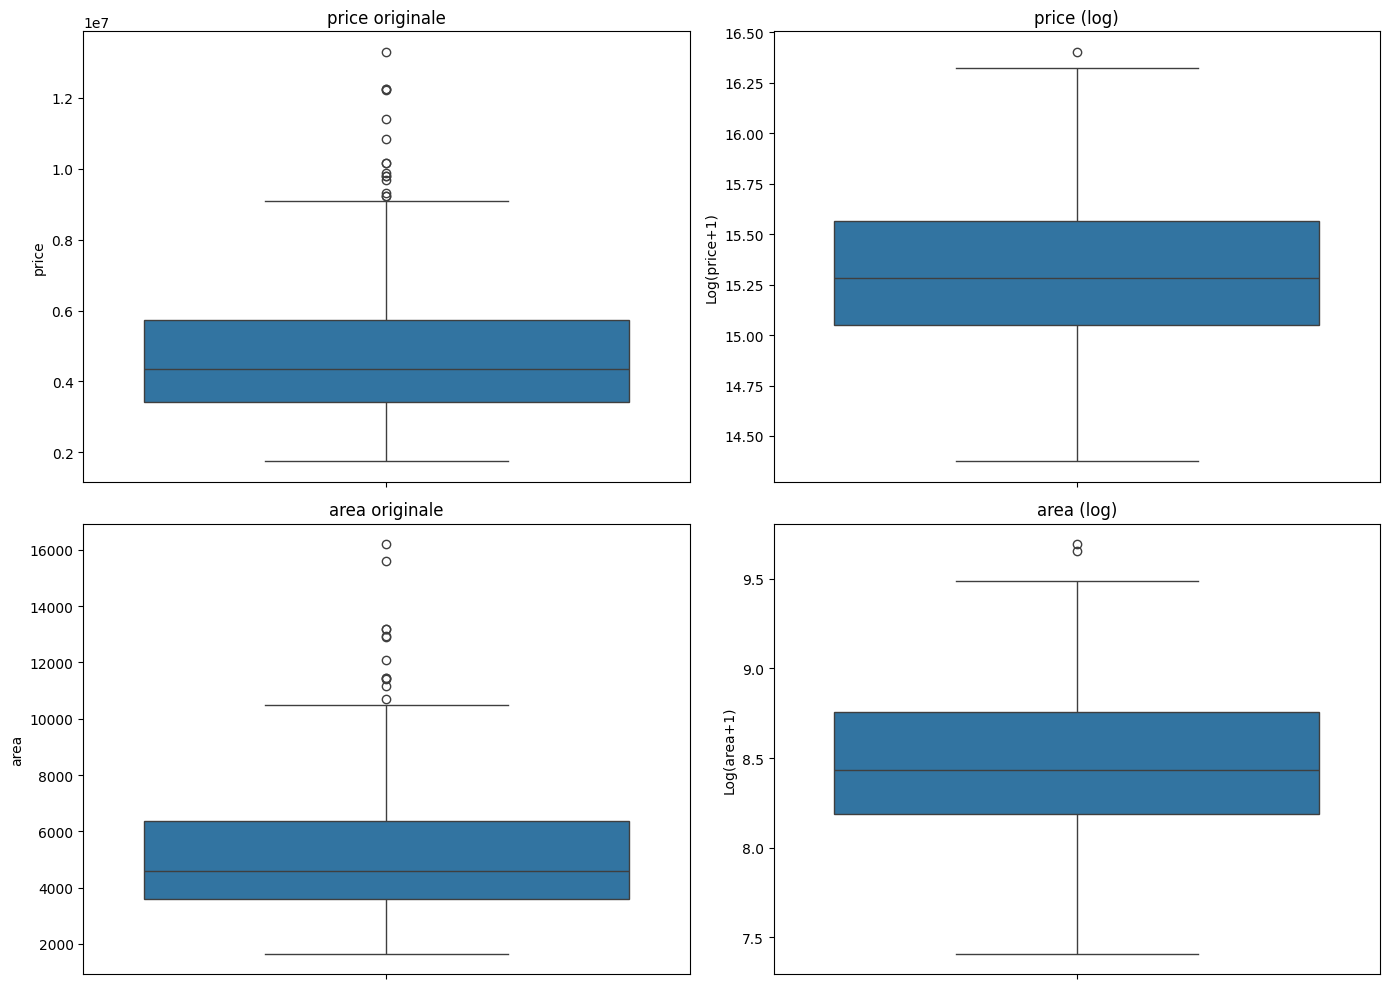

In [ ]:
#trasformiamo target price e variabile area con logaritmo
housing_encoded["price_log"] = np.log1p(housing_encoded["price"])
housing_encoded["area_log"] = np.log1p(housing_encoded["area"])

#visualizziamo i boxplot di price e area prima e dopo la trasformazione
#impostiamo dimensioni figure
plt.figure(figsize=(14, 10))

#boxplot per price
plt.subplot(2, 2, 1)
sns.boxplot(y=housing_encoded["price"])
plt.title("price originale")
plt.ylabel("price")

plt.subplot(2, 2, 2)
sns.boxplot(y=housing_encoded["price_log"])
plt.title("price (log)")
plt.ylabel("Log(price+1)")

#boxplot per area
plt.subplot(2, 2, 3)
sns.boxplot(y=housing_encoded["area"])
plt.title("area originale")
plt.ylabel("area")

plt.subplot(2, 2, 4)
sns.boxplot(y=housing_encoded["area_log"])
plt.title("area (log)")
plt.ylabel("Log(area+1)")

plt.tight_layout()
plt.show()

##<font color= "#84B19C">Hold-out: divisione in Training e Test set </font>

Per ridurre il rischio di overfitting nei modelli di regressione lineare, viene utilizzato l'<font color= "#84B19C">**Hold-out**</font> per suddividere il dataset in <font color= "#84B19C">**Training e Test set**</font> utilizzando la libreria Scikit-learn. Dato che è stata applicata una trasformazione logaritmica al target (price), l'Hold-out viene effettuato considerando il target trasformato (price_log). Il codice nello specifico:
1. Crea le feature (`X`) dal dataset per l'addestramento, ovvero tutte le colonne tranne la colonna target price e price_log.
2. Crea il target (`y_log`) dal dataset per le previsioni, ovvero la colonna price_log per il target trasformato con il logaritmo.
3. Divide i dati in Training e Test set, impostando il `test_size` al 30% e un `random_state=42` per garantire la riproducibilità della divisione.
4. Mostra le dimensioni del Training e Test set per le feature (`X_train, X_test`) e per il target (`y_train, y_test`).

Il Training set risultante conta il 70% dei dati (dimensioni `(381, 15)` per le feature e `(381,)` per il target), mentre il Test set il 30% (dimensioni `(164, 15)` per le feature e `(164,)` per il target), confermando una suddivisione equilibrata. Per garantire prestazioni migliori, è stato utilizzato il target trasformato in logaritmo (dopo aver testato i modelli sia sul target originale che trasformato). Questo passaggio aiuta a mitigare il rischio di overfitting e consente di valutare le prestazioni dei modelli su dati mai visti durante l'addestramento.

In [ ]:
#creiamo feature (X) e target (y)
# X = housing_encoded.drop(["price"], axis=1)
# y = housing_encoded["price"]

#feature (X) e target (y) usando trasformazione in logaritmo
X = housing_encoded.drop(["price", "price_log"], axis=1) #tutte feature tranne price e price_log
y_log = housing_encoded["price_log"] #target trasformato in logaritmo

#dividiamo i dati in training e test set per target trasformato in log
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=42) #mettere y_log al posto di y

#mostriamo le dimensioni per i due set
print(f"Dimensione training set per le feature: {X_train.shape}\n")
print(f"Dimensione test set per le feature: {X_test.shape}\n")
print(f"Dimensione training set per il target: {y_train.shape}\n")
print(f"Dimensione test set per il target: {y_test.shape}\n")

Dimensione training set per le feature: (381, 15)

Dimensione test set per le feature: (164, 15)

Dimensione training set per il target: (381,)

Dimensione test set per il target: (164,)



##<font color= "#84B19C">Standardizzazione</font>

Viene applicata una <font color= "#84B19C">**standardizzazione**</font> con la libreria Scikit-learn per le colonne numeriche continue, per ottimizzare il loro impatto sui modelli di regressione lineare. Le colonne standardizzate sono:
* <font color= "#84B19C">**Area**</font>: Superficie dell’immobile.
* <font color= "#84B19C">**Bedrooms**</font>: Numero di camere da letto.
* <font color= "#84B19C">**Bathrooms**</font>: Numero di bagni.
* <font color= "#84B19C">**Stories**</font>: Numero di piani.
* <font color= "#84B19C">**Parking**</font>: Numero di parcheggi.

Le colonne binarie (0 e 1) e quelle categoriche one-hot encoded non necessitano di standardizzazione, in quanto rappresentano valori discreti e non variabili numeriche continue. Il codice nello specifico:
1. Seleziona le colonne numeriche per la standardizzazione.
2. Crea un'istanza della classe `StandardScaler()`, che porta le features ad una distribuzione con media 0 e deviazione standard 1.
3. Crea una copia di `X_train` e `X_test` per evitare di modificare direttamente il DataFrame originale.
4. Applica la standardizzazione al training set con il metodo `fit_transform()`, calcolando media e deviazione standard.
5. Applica la stessa trasformazione al test set con il metodo `transform()`, utilizzando i parametri calcolati sul training set.

Le altre colonne (binarie e categoriche) rimangono invariate. Questo passaggio permette di garantire che tutte le feature numeriche contribuiscano equamente ai modelli di regressione lineare, migliorando la stabilità e le prestazioni.


In [ ]:
#selezioniamo le colonne numeriche da standardizzare
to_std_features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
#creiamo lo StandardScaler
ss = StandardScaler()

#creiamo una copia del dataframe
X_train_std = X_train.copy()
X_test_std = X_test.copy()

#standardizziamo solo le colonne selezionate nel training set (fit-transform)
X_train_std[to_std_features] = ss.fit_transform(X_train[to_std_features])
#applichiamo la stessa trasformazione al test set (solo transform)
X_test_std[to_std_features] = ss.transform(X_test[to_std_features])

#<font color= "#84B19C">Modelli di Regressione Lineare </font>

Per prima cosa, per poter valutare le prestazioni dei modelli di regressione lineare, viene definita la funzione `evaluate_model()` per calcolare diverse metriche di errore sia su scala logaritmica (dove i modelli vengono addestrati) che su scala originale dei dati (dopo trasformazione inversa). Il codice nello specifico:
1. Riceve in input un modello e un dataset contenente le feature (`X`) e il target trasformato (`y_log`).
2. Genera le previsioni del modello (`y_pred_log`).
3. Calcola le seguenti metriche di errore su scala logaritmica:
> * <font color= "#84B19C">**R²**</font> (R-squared): coefficiente di determinazione.
> * <font color= "#84B19C">**MSE**</font> (Mean Squared Error): errore quadratico medio.
> * <font color= "#84B19C">**RMSE**</font> (Root Mean Squared Error): radice dell'errore quadratico medio.
> * <font color= "#84B19C">**MAE**</font> (Mean Absolute Error): errore assoluto medio.

4. Applica la trasformazione inversa con il metodo `expm1()`, per riportare sia le previsioni che i valori reali alla scala originale.
5. Calcola nuovamente le metriche di errore su scala originale dei dati, utilizzando `y_pred` e `y_real`.
6. Recupera il nome del modello in esecuzione.
7. Restituisce un dizionario contenente il nome del modello e tutte le metriche calcolate, arrotondate a 6 cifre decimali.

Questo approccio permette di valutare le prestazioni dei modelli sia nella scala logaritmica in cui vengono addestrati che nella scala originale dei dati, garantendo un'interpretazione dell'impatto della trasformazione sulle previsioni reali.

In [ ]:
#funzione per valutare i modelli
def evaluate_model(model, dataset):
  X, y_log = dataset #y_log = target trasformato con logaritmo
  #predizioni del modello su target logaritmico
  y_pred_log = model.predict(X)

  #calcoliamo le metriche sulla sscala logaritmica
  metrics_log = {
      "R²": r2_score(y_log, y_pred_log),
      "MSE": mean_squared_error(y_log, y_pred_log),
      "RMSE": np.sqrt(mean_squared_error(y_log, y_pred_log)),
      "MAE": mean_absolute_error(y_log, y_pred_log)
  }

  #otteniamo inverso della trasformazione logaritmica
  y_pred = np.expm1(y_pred_log) #riporta predizioni price alla scala originale
  y_real = np.expm1(y_log) #riporta valori reali price alla scala originale

  #calcoliamo le metriche sulla scala originale
  metrics_original = {
      "R²": r2_score(y_real, y_pred),
      "MSE": mean_squared_error(y_real, y_pred),
      "RMSE": np.sqrt(mean_squared_error(y_real, y_pred)),
      "MAE": mean_absolute_error(y_real, y_pred)
  }

  #ottieniamo il nome del modello
  model_name = type(model).__name__

  #restituiamo un dizionario con nome del modello e tutte le metriche
  return {
      "Model": model_name,
      "R² scala logaritmica": round(metrics_log["R²"], 6),
      "MSE scala logaritmica": round(metrics_log["MSE"], 6),
      "RMSE scala logaritmica": round(metrics_log["RMSE"], 6),
      "MAE scala logaritmica": round(metrics_log["MAE"], 6),
      "R² scala reale": round(metrics_original["R²"], 6),
      "MSE scala reale": round(metrics_original["MSE"], 6),
      "RMSE scala reale": round(metrics_original["RMSE"], 6),
      "MAE scala reale": round(metrics_original["MAE"], 6)
  }


##<font color= "#84B19C">Modello di regressione lineare - Linear Regression </font>

Per costruire un primo <font color= "#84B19C">**modello di regressione lineare semplice**</font>, viene utilizzata la classe `LinearRegression()` di Scikit-learn. Questo modello assume una relazione lineare tra le feature e il target trasformato, senza applicare regolarizzazioni. Il codice nello specifico:
1. Crea un'istanza della classe `LinearRegression()`.
2. Addestra il modello con il metodo `fit()` sul training set standardizzato con il target trasformato.

In [ ]:
#modello di regressione lineare semplice

lr = LinearRegression()
#effettuiamo addestramento
lr.fit(X_train_std, y_train)

LinearRegression()

###<font color= "#84B19C">Valutazione delle performance con R², MSE, RMSE e MAE</font>

Vengono valutate le prestazioni del <font color= "#84B19C">**modello di regressione lineare semplice**</font> utilizzando la funzione `evaluate_model()`, che calcola le metriche di performance R², MSE, RMSE e MAE. Tali metriche permottono di effettuare una valutazione complessiva delle prestazioni e capacità predittiva del modello. Il codice nello specifico:
1. Valuta le prestazioni del modello sul training set per verificare le capacità del modello di adattarsi ai dati utilizzati per l'addestramento.
2. Valuta le prestazioni del modello sul test set per verificare la capacità del modello di generalizzare su dati non visti.

Dai risultati ottenuti emergono le seguenti osservazioni:
* <font color= "#84B19C">**Scala logaritmica**</font>:
> * <font color= "#84B19C">**R²**</font> (train set): 0.723691 → buono, il modello spiega circa il 72% della varianza del target nel training set.
> * <font color= "#84B19C">**R²**</font> (test set): 0.668160 → discreto, con una leggera perdita di prestazioni su dati nuovi.
> * <font color= "#84B19C">**MSE**</font> (train set): 0.033974 → contenuto, indica un errore ridotto in scala logaritmica.
> * <font color= "#84B19C">**MSE**</font> (test set): 0.057564 → contenuto, indica una leggera perdita di precisione su dati nuovi.
> * <font color= "#84B19C">**RMSE**</font> (train set): 0.184320 → contenuto, conferma un errore medio ridotto in scala logaritmica.
> * <font color= "#84B19C">**RMSE**</font> (test set): 0.239926 → contenuto, conferma una leggera perdita di precisione su dati nuovi.
> * <font color= "#84B19C">**MAE**</font> (train set): 0.142921 → contenuto, indica che le previsioni  si discostano poco dai valori reali.
> * <font color= "#84B19C">**MAE**</font> (test set): 0.1891134 → contenuto, indica una leggera perdita di precisione su dati nuovi.

* <font color= "#84B19C">**Scala originale**</font>:
> * <font color= "#84B19C">**R²**</font> (train set): 0.713900 → buono, molto vicino al valore ottenuto in scala logaritmica.
> * <font color= "#84B19C">**R²**</font> (test set): 0.660356 → discreto, con una leggera perdita di prestazioni su dati nuovi.
> * <font color= "#84B19C">**MSE**</font> (train set): 898,800,499,678.7866 → molto elevato, suggerisce difficoltà nelle previsioni dei prezzi reali.
> * <font color= "#84B19C">**MSE**</font> (test set): 1,462,640,000,224.307 → ancora più elevato, suggerisce diffcoltà di generalizzazione su dati nuovi.
> * <font color= "#84B19C">**RMSE**</font> (train set): 948,050.895089 → molto elevato, conferma un errore medio molto ampio su scala originale.
> * <font color= "#84B19C">**RMSE**</font> (test set): 1,209,396.543828 → ancora più elevato, conferma una perdita di precisione su dati nuovi.
> * <font color= "#84B19C">**MAE**</font> (train set): 678,330.685136 → molto elevato, suggerisce difficoltà nelle previsioni dei prezzi reali.
> * <font color= "#84B19C">**MAE**</font> (test set): 891,812.029529 → ancora più più elevato, conferma una perdita di precisione su dati nuovi.

In sintesi, su scala logaritmica il modello mostra buone prestazioni, con R² (0.72 e 0.67) in grado di spiegare circa il 72% della varianza nel training set e il 67% nel test set. Viene osservata una leggera perdita di precisione nelle previsioni su dati non visti, suggerendo un possibile lieve overfitting. Su scala originale, il modello mostra MSE, RMSE, MAE molto elevati, suggerendo una difficoltà nelle previsioni sulla scala di prezzi reali. Per migliorare le prestazioni complessive, nelle prossime sezioni verranno applicati modelli di regolarizzazione.

In [ ]:
#valutiamo le performance sul training set
evaluate_model(lr, (X_train_std, y_train))

{'Model': 'LinearRegression',
 'R² scala logaritmica': 0.723691,
 'MSE scala logaritmica': 0.033974,
 'RMSE scala logaritmica': 0.18432,
 'MAE scala logaritmica': 0.142921,
 'R² scala reale': 0.7139,
 'MSE scala reale': 898800499678.7866,
 'RMSE scala reale': 948050.895089,
 'MAE scala reale': 678330.685136}

In [ ]:
#valutiamo le performance sul test set
evaluate_model(lr, (X_test_std, y_test))

{'Model': 'LinearRegression',
 'R² scala logaritmica': 0.66816,
 'MSE scala logaritmica': 0.057564,
 'RMSE scala logaritmica': 0.239926,
 'MAE scala logaritmica': 0.189134,
 'R² scala reale': 0.660356,
 'MSE scala reale': 1462640000224.307,
 'RMSE scala reale': 1209396.543828,
 'MAE scala reale': 891812.029529}

##<font color= "#84B19C">Modello con regolarizzazione Ridge - Ridge Regression </font>

Viene gestita la regolarizzazione implementando un <font color= "#84B19C">**modello di regressione Ridge (L2)**</font> per migliorare la capacità del modello di generalizzare su dati nuovi. La regolarizzazione Ridge (L2) aggiunge un termine di penalizzazione proporzionale alla somma dei quadrati dei coefficienti, riducendo così il rischio di overfitting. Il codice nello specifico:
1. Definisce un range di valori per l'iperparametro alpha, che controlla l'intensità della regolarizzazione.
2. Ricerca il miglior valore di alpha tramite cross-validation di `GridSearchCV()`, definendo un numero di fold (`cv=5`) su cui testare ogni valore nel range di alpha per un numero definito di iterazioni (`max_iter=10000`).
3. Ricerca il miglior valore di alpha che minimizza l'errore quadratico medio con il parametro `scoring="neg_mean_squared_error"`.
4. Addestra il modello sui diversi fold del training set.
5. Seleziona il valore migliore di alpha con `grid_ridge.best_estimator_` (1.0).
6. Crea un'istanza della classe `Ridge()` con `alpha=1.0`.
7. Addestra il modello con il metodo `fit()` sul training set standardizzato con il target trasformato.

In [ ]:
#calcoliamo valore migliore per alpha
range_alpha = {"alpha": [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]}
grid_ridge = GridSearchCV(Ridge(max_iter=10000), range_alpha, cv=5, scoring="neg_mean_squared_error")
grid_ridge.fit(X_train_std, y_train)
best_ridge = grid_ridge.best_estimator_
print(f"Miglior alpha per Ridge: {grid_ridge.best_params_['alpha']}")

Miglior alpha per Ridge: 1.0


In [ ]:
#modello con regolarizzazione Ridge

#lambda = intensità della regolarizzazione
ridge = Ridge(alpha=1.0)
#effettuiamo addestramento
ridge.fit(X_train_std, y_train)

Ridge()

###<font color= "#84B19C">Valutazione delle performance con R², MSE, RMSE e MAE</font>

Vengono valutate le prestazioni del <font color= "#84B19C">**modello di regressione Ridge (L2)**</font> utilizzando la funzione `evaluate_model()`, che calcola le metriche di performance R², MSE, RMSE e MAE. Il codice nello specifico:
1. Valuta le prestazioni del modello sul training set per verificare le capacità del modello di adattarsi ai dati utilizzati per l'addestramento.
2. Valuta le prestazioni del modello sul test set per verificare la capacità del modello di generalizzare su dati non visti.

Dai risultati ottenuti emergono le seguenti osservazioni:
* <font color= "#84B19C">**Scala logaritmica**</font>:
> * <font color= "#84B19C">**R²**</font> (train set): 0.723177 - buono, molto simile a LinearRegression, suggerendo che la regolarizzazione L2 non modifica significativamente le prestazioni del modello.
> * <font color= "#84B19C">**R²**</font> (test set): 0.666645 → discreto, leggermente più basso di LinearRegression, suggerendo che la regolarizzazione L2 non migliora significativamente le prestazioni su dati nuovi.
> * <font color= "#84B19C">**MSE**</font> (train set): 0.034037 → contenuto, uguale a LinearRegression.
> * <font color= "#84B19C">**MSE**</font> (test set): 0.057827 → contenuto, leggermente più alto di LinearRegression.
> * <font color= "#84B19C">**RMSE**</font> (train set): 0.184491 → contenuto, molto simile a LinearRegression.
> * <font color= "#84B19C">**RMSE**</font> (test set): 0.240473 → contenuto, leggermente più alto di LinearRegression.
> * <font color= "#84B19C">**MAE**</font> (train set): 0.143423 → contenuto, molto simile a LinearRegression.
> * <font color= "#84B19C">**MAE**</font> (test set): 0.189449 → contenuto, leggermente più alto di LinearRegression.

* <font color= "#84B19C">**Scala originale**</font>:
> * <font color= "#84B19C">**R²**</font> (train set): 0.71302 → buono, leggermente più basso di LinearRegression.
> * <font color= "#84B19C">**R²**</font> (test set): 0.659502 → discreto, leggermente più basso di LinearRegression.
> * <font color= "#84B19C">**MSE**</font> (train set): 901,565,676,851.584 → molto elevato, leggermente più alto di LinearRegression.
> * <font color= "#84B19C">**MSE**</font> (test set): 1,466,318,887,605.851 → molto elevato, più alto di LinearRegression.
> * <font color= "#84B19C">**RMSE**</font> (train set): 949,508.123636 → molto elevato, molto simile a LinearRegression.
> * <font color= "#84B19C">**RMSE**</font> (test set): 1,210,916.548572 → molto elevato, leggermente più alto di LinearRegression.
> * <font color= "#84B19C">**MAE**</font> (train set): 681,422.425546 → molto elevato, molto simile a LinearRegression.
> * <font color= "#84B19C">**MAE**</font> (test set): 891,738.080347 → molto elevato, molto simile a LinearRegression.

In sintesi, il modello Ridge mostra prestazioni molto simili o leggermente inferiori rispetto alla regressione lineare semplice. Questo suggerisce che la regolarizzazione L2 nel complesso non apporta miglioramenti al modello, ma potrebbe piuttosto penalizzare le prestazioni per questo specifico dataset.

In [ ]:
#valutiamo il training set
evaluate_model(ridge, (X_train_std, y_train))

{'Model': 'Ridge',
 'R² scala logaritmica': 0.723177,
 'MSE scala logaritmica': 0.034037,
 'RMSE scala logaritmica': 0.184491,
 'MAE scala logaritmica': 0.143423,
 'R² scala reale': 0.71302,
 'MSE scala reale': 901565676851.584,
 'RMSE scala reale': 949508.123636,
 'MAE scala reale': 681422.425546}

In [ ]:
#valutiamo il test set
evaluate_model(ridge, (X_test_std, y_test))

{'Model': 'Ridge',
 'R² scala logaritmica': 0.666645,
 'MSE scala logaritmica': 0.057827,
 'RMSE scala logaritmica': 0.240473,
 'MAE scala logaritmica': 0.189449,
 'R² scala reale': 0.659502,
 'MSE scala reale': 1466318887605.851,
 'RMSE scala reale': 1210916.548572,
 'MAE scala reale': 891738.080347}

##<font color= "#84B19C">Modello con regolarizzazione Lasso - Lasso Regression </font>

Viene gestita un'ulteriore regolarizzazione implementando un <font color= "#84B19C">**modello di regressione Lasso (L1)**</font>, che opera sui coefficienti effettuando una selezione automatica delle feature, eliminando quelle meno rilevanti portando i loro coefficienti a zero. Il codice nello specifico:
1. Definisce un range di valori per l'iperparametro alpha, che controlla l'intensità della regolarizzazione.
2. Ricerca il miglior valore di alpha tramite cross-validation di `GridSearchCV()`, definendo un numero di fold (`cv=5`) su cui testare ogni valore nel range di alpha per un numero definito di iterazioni (`max_iter=10000`).
3. Ricerca il miglior valore di alpha che minimizza l'errore quadratico medio con il parametro `scoring="neg_mean_squared_error"`.
4. Addestra il modello sui diversi fold del training set.
5. Seleziona il valore migliore di alpha con `grid_lasso.best_estimator_` (0.001).
6. Crea un'istanza della classe `Lasso()` con `alpha=0.001`.
7. Addestra il modello con il metodo `fit()` sul training set standardizzato con il target trasformato.

In [ ]:
#calcoliamo valore migliore per alpha
range_alpha = {"alpha": [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]}
grid_lasso = GridSearchCV(Lasso(max_iter=10000), range_alpha, cv=5, scoring="neg_mean_squared_error")
grid_lasso.fit(X_train_std, y_train)
best_lasso = grid_lasso.best_estimator_
print(f"Miglior alpha per Lasso: {grid_lasso.best_params_['alpha']}")

Miglior alpha per Lasso: 0.001


In [ ]:
#modello con regolarizzazione Lasso

#definiamo lambda = intensità della regolarizzazione
lasso = Lasso(alpha=0.001)
#effettuiamo addestramento
lasso.fit(X_train_std, y_train)

Lasso(alpha=0.001)

###<font color= "#84B19C">Valutazione delle performance con R², MSE, RMSE e MAE</font>

Vengono valutate le prestazioni del <font color= "#84B19C">**modello di regressione Lasso (L1)**</font> utilizzando la funzione `evaluate_model()`, che calcola le metriche di performance R², MSE, RMSE e MAE. Il codice nello specifico:
1. Valuta le prestazioni del modello sul training set per verificare le capacità del modello di adattarsi ai dati utilizzati per l'addestramento.
2. Valuta le prestazioni del modello sul test set per verificare la capacità del modello di generalizzare su dati non visti.

Dai risultati ottenuti emergono le seguenti osservazioni:
* <font color= "#84B19C">**Scala logaritmica**</font>:
> * <font color= "#84B19C">**R²**</font> (train set): 0.722979 - buono, leggermente più basso di Ridge e LinearRegression, suggerisce che la penalizzazione di L1 sui coefficienti riduce la capacità del modello di adattarsi ai dati di training.
> * <font color= "#84B19C">**R²**</font> (test set): 0.663864 → discreto, più basso di Ridge e LinearRegression, suggerisce una lieve perdita di prestazioni su dati nuovi.
> * <font color= "#84B19C">**MSE**</font> (train set): 0.034061 → contenuto, leggermente più alto di Ridge e LinearRegression.
> * <font color= "#84B19C">**MSE**</font> (test set): 0.05831 → contenuto, leggermente più alto di Ridge e LinearRegression.
> * <font color= "#84B19C">**RMSE**</font> (train set): 0.184557 → contenuto, molto simile a Ridge e LinearRegression.
> * <font color= "#84B19C">**RMSE**</font> (test set): 0.241474 → contenuto, leggermente più alto di Ridge e LinearRegression.
> * <font color= "#84B19C">**MAE**</font> (train set): 0.143246 → contenuto, molto simile a Ridge e LinearRegression.
> * <font color= "#84B19C">**MAE**</font> (test set): 0.19012 → contenuto, leggermente più alto di Ridge e LinearRegression.

* <font color= "#84B19C">**Scala originale**</font>:
> * <font color= "#84B19C">**R²**</font> (train set): 0.712156 → buono, leggermente più basso di Ridge e LinearRegression.
> * <font color= "#84B19C">**R²**</font> (test set): 0.656989 → discreto, leggermente più basso di Ridge e LinearRegression.
> * <font color= "#84B19C">**MSE**</font> (train set): 904,279,362,632.093 → molto elevato, leggermente più alto di Ridge e LinearRegression.
> * <font color= "#84B19C">**MSE**</font> (test set): 1,477,137,702,233.3635 → molto elevato, leggermente più alto di Ridge e LinearRegression.
> * <font color= "#84B19C">**RMSE**</font> (train set): 950,936.0455  → molto elevato, leggermente più alto di Ridge e LinearRegression.
> * <font color= "#84B19C">**RMSE**</font> (test set): 1,215,375.53959 → molto elevato, leggermente più alto di Ridge e LinearRegression.
> * <font color= "#84B19C">**MAE**</font> (train set): 680,752.417977 → molto elevato, leggermente più basso di Ridge ma più alto di LinearRegression.
> * <font color= "#84B19C">**MAE**</font> (test set): 894,848.759687 → molto elevato, più alto di Ridge e LinearRegression.

In sintesi, il modello Lasso mostra prestazioni leggermente inferiori rispetto a Ridge e a LinearRegression. Questo suggerisce che la penalizzazione di L1 sui coefficienti (e conseguente selezione delle feature) nel complesso non apporta miglioramenti significativi al modello, ma potrebbe piuttosto penalizzare le prestazioni per questo specifico dataset. Anche il valore di alpha trovato da GridSearchCV (0.001, molto basso) suggerisce che la penalizzazione L1 è minima e non particolarmente adatta al dataset.

In [ ]:
#valutiamo il training set
evaluate_model(lasso, (X_train_std, y_train))

{'Model': 'Lasso',
 'R² scala logaritmica': 0.722979,
 'MSE scala logaritmica': 0.034061,
 'RMSE scala logaritmica': 0.184557,
 'MAE scala logaritmica': 0.143246,
 'R² scala reale': 0.712156,
 'MSE scala reale': 904279362632.093,
 'RMSE scala reale': 950936.0455,
 'MAE scala reale': 680752.417977}

In [ ]:
#valutiamo il test set
evaluate_model(lasso, (X_test_std, y_test))

{'Model': 'Lasso',
 'R² scala logaritmica': 0.663864,
 'MSE scala logaritmica': 0.05831,
 'RMSE scala logaritmica': 0.241474,
 'MAE scala logaritmica': 0.19012,
 'R² scala reale': 0.656989,
 'MSE scala reale': 1477137702233.3635,
 'RMSE scala reale': 1215375.53959,
 'MAE scala reale': 894848.759687}

##<font color= "#84B19C">Modello con regolarizzazione Elastic Net - Elastic Net Regression </font>

Viene gestita una regolarizzazione combinata implementando un <font color= "#84B19C">**modello di regressione Elastic Net (L1+L2)**</font>, che integra sia la penalizzazione L1 di Lasso, utile per la selezione delle feature, sia la penalizzazione L2 di Ridge, che riduce il rischio di overfitting. Il codice nello specifico:

1. Definisce un range di valori per gli iperparametri alpha (intensità della regolarizzazione) e l1_ratio (bilanciamento tra L1 e L2).
2. Ricerca il miglior valore di alpha e di l1_ratio tramite cross-validation di `GridSearchCV()`, definendo un numero di fold (`cv=5`) su cui testare ogni valore nel range per un numero definito di iterazioni (`max_iter=10000`).
3. Ricerca il miglior valore di alpha e di l1_ratio che minimizza l'errore quadratico medio con il parametro `scoring="neg_mean_squared_error"`.
4. Addestra il modello sui diversi fold del training set.
5. Seleziona i valori migliori con `grid_enet.best_estimator_` (alpha=0.001, l1_ratio=0.9).
6. Crea un'istanza della classe `ElasticNet()` con `alpha=0.001` e `l1_ratio=0.9`.
7. Addestra il modello con il metodo `fit()` sul training set standardizzato con il target trasformato.

In [ ]:
#calcoliamo valore migliore per alpha e l1 ratio
range_alpha_l1ratio = {
    "alpha": [0.001, 0.01, 0.1, 0.5, 1.0],
    "l1_ratio": [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9]
}
grid_enet = GridSearchCV(ElasticNet(max_iter=10000), range_alpha_l1ratio, cv=5, scoring="neg_mean_squared_error")
grid_enet.fit(X_train_std, y_train)
best_enet = grid_enet.best_estimator_
print(f"Miglior alpha per Elastic Net: {grid_enet.best_params_['alpha']}\nMiglior l1_ratio per Elastic Net: {grid_enet.best_params_['l1_ratio']}")

Miglior alpha per Elastic Net: 0.001
Miglior l1_ratio per Elastic Net: 0.9


In [ ]:
#modello con regolarizzazione Elastic Net

#definiamo lambda = intensità della regolarizzazione
#definiamo l1_ratio = peso da dare alle 2 regolarizzazioni
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.9) #90% L1/Lasso
#effettuiamo addestramento
elasticnet.fit(X_train_std, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.9)

###<font color= "#84B19C">Valutazione delle performance con R², MSE, RMSE e MAE</font>

Vengono valutate le prestazioni del <font color= "#84B19C">**modello di regressione ElasticNet (L1+L2)**</font> utilizzando la funzione `evaluate_model()`, che calcola le metriche di performance R², MSE, RMSE e MAE. Il codice nello specifico:
1. Valuta le prestazioni del modello sul training set per verificare le capacità del modello di adattarsi ai dati utilizzati per l'addestramento.
2. Valuta le prestazioni del modello sul test set per verificare la capacità del modello di generalizzare su dati non visti.

Dai risultati ottenuti emergono le seguenti osservazioni:
* <font color= "#84B19C">**Scala logaritmica**</font>:
> * <font color= "#84B19C">**R²**</font> (train set): 0.723041 - buono, uguale al modello Lasso ma leggermente più basso di Ridge e LinearRegression, conferma l'impatto negativo della penalizzazione sui coefficienti.
> * <font color= "#84B19C">**R²**</font> (test set): 0.664226 → discreto, leggermente più alto di Lasso ma più basso di Ridge e LinearRegression, suggerisce una leggera perdita di prestazioni su dati nuovi.
> * <font color= "#84B19C">**MSE**</font> (train set): 0.034054 → contenuto, uguale a Lasso e leggermente più alto di Ridge e LinearRegression.
> * <font color= "#84B19C">**MSE**</font> (test set): 0.058247 → contenuto, leggermente più basso di Lasso ma più alto di Ridge e LinearRegression.
> * <font color= "#84B19C">**RMSE**</font> (train set): 0.184536 → contenuto, molto simile a Lasso, Ridge e LinearRegression.
> * <font color= "#84B19C">**RMSE**</font> (test set): 0.241344 → contenuto, leggermente più basso di Lasso ma più alto di Ridge e LinearRegression.
> * <font color= "#84B19C">**MAE**</font> (train set): 0.143264 → contenuto, molto simile a Lasso, Ridge e LinearRegression.
> * <font color= "#84B19C">**MAE**</font> (test set): 0.190037 → contenuto, molto simile a Lasso, Ridge e LinearRegression.

* <font color= "#84B19C">**Scala originale**</font>:
> * <font color= "#84B19C">**R²**</font> (train set): 0.712304 → buono, molto simile a Lasso ma leggermente più basso di Ridge e LinearRegression.
> * <font color= "#84B19C">**R²**</font> (test set): 0.657302 → discreto, leggermente più alto di Lasso ma più basso di Ridge e LinearRegression.
> * <font color= "#84B19C">**MSE**</font> (train set): 903,814,784,722.2828 → molto elevato, leggermente più basso di Lasso ma più alto di Ridge e LinearRegression.
> * <font color= "#84B19C">**MSE**</font> (test set): 1,475,792,770,686.4238 → molto elevato, leggermente più basso di Lasso ma più alto di Ridge e LinearRegression.
> * <font color= "#84B19C">**RMSE**</font> (train set): 950,691.740115  → molto elevato, molto simile a Lasso e leggermente più alto di Ridge e LinearRegression.
> * <font color= "#84B19C">**RMSE**</font> (test set): 1,214,822.114833 → molto elevato, leggermente più basso di Lasso ma più alto di Ridge e LinearRegression.
> * <font color= "#84B19C">**MAE**</font> (train set): 680,796.86 → molto elevato, simile a Lasso e Ridge ma più alto di LinearRegression.
> * <font color= "#84B19C">**MAE**</font> (test set): 894,492.529271 → molto elevato, più basso di Lasso ma più alto di Ridge e LinearRegression.

In sintesi, il modello Elastic Net con gli iperparametri calcolati da GridSearchCV (alpha=0.001, l1_ratio=0.9) mostra prestazioni molto simili o leggermente superiori a Lasso, ma complessivamente inferiori rispetto a Ridge e LinearRegression. Questo risultato è coerente considerando che con l1_ratio=0.9 il modello utilizza principalmente regolarizzazione L1 (90% Lasso) e solo in minima parte L2 (10% Ridge). Per esplorare ulteriormente il margine di miglioramento con Elastic Net, vengono testati ulteriori modelli di Elastic Net con valori di l1_ratio più bassi (favorendo la regolarizzazione Ridge), ottenendo per alcuni prestazioni leggermente migliori (per esempio con alpha=0.001, l1_ratio=0.1) ma non complessivamente migliorate, pertanto non vengono incluse nel progetto.

In [ ]:
#valutiamo il training set
evaluate_model(elasticnet, (X_train_std, y_train))

{'Model': 'ElasticNet',
 'R² scala logaritmica': 0.723041,
 'MSE scala logaritmica': 0.034054,
 'RMSE scala logaritmica': 0.184536,
 'MAE scala logaritmica': 0.143264,
 'R² scala reale': 0.712304,
 'MSE scala reale': 903814784722.2828,
 'RMSE scala reale': 950691.740115,
 'MAE scala reale': 680796.856398}

In [ ]:
#valutiamo il test set
evaluate_model(elasticnet, (X_test_std, y_test))

{'Model': 'ElasticNet',
 'R² scala logaritmica': 0.664226,
 'MSE scala logaritmica': 0.058247,
 'RMSE scala logaritmica': 0.241344,
 'MAE scala logaritmica': 0.190037,
 'R² scala reale': 0.657302,
 'MSE scala reale': 1475792770686.4238,
 'RMSE scala reale': 1214822.114833,
 'MAE scala reale': 894492.529271}

## <font color= "#84B19C">Visualizzazione delle performance: R², MSE, RMSE, MAE </font>

Vengono confrontate le prestazioni dei quattro modelli di regressione lineare implementati con una <font color= "#84B19C">**heatmap**</font> di Seaborn che mostra le metriche di valutazione calcolate sia sul training che sul test set su scala logaritmica per ogni modello. L'analisi viene effettuata in questa scala poiché i valori delle metriche su scala reale risultano troppo alti, rendendo difficile una valutazione efficace. La visualizzazione tramite heatmap permette di individuare facilmente le differenze nelle prestazioni dei modelli grazie alle variazioni cromatiche. Il codice nello specifico:
1. Definisce un dizionario con i quattro modelli implementati (`LinearRegression`, `Ridge`, `Lasso`, `ElasticNet`).
2. Valuta le prestazioni per ogni modello con la funzione `evaluate_model()`, salvando i risultati in una lista.
3. Converte la lista di risultati in un DataFrame e seleziona solo le metriche calcolate su scala logaritmica.
4. Trasforma i dati in un formato adatto per la heatmap di Seaborn, rinominando anche le colonne per una migliore leggibilità.
5. Imposta le dimensioni della figura con il metodo `figure()`.
6. Utilizza il metodo `heatmap()` di Seaborn per creare una mappa di colori basata sulle valutazioni per training e test set.
7. Mostra i valori numerici direttamente sulla heatmap con `annot=True`, per facilitare l'interpretazione.
8. Applica la palette di colori `cmap="coolwarm"`, dove il blu rappresenta i valori più bassi e il rosso quelli più alti.
9. Formatta i valori con sei cifre decimali con `fmt=".6f"` per evidenziare le differenze anche minime tra i modelli.
10. Aggiunge una barra dei colori con `cbar_kws={"label": "Valore"}` per evidenziare la scala dei valori.
11. Aggiunge titoli ed etichette per facilitare l'interpretazione.
12. Mostra la heatmap risultante.

Dalla heatmap si osservano valori delle metriche molto simili tra i quattro modelli, sia nel training set che nel test set. Le differenze cromatiche sono minime, confermando che le prestazioni dei modelli sono complessivamente comparabili. La regressione lineare semplice mostra le migliori prestazioni complessive, suggerendo che i dati presenti nel dataset non presentano problemi significativi di collinearità o overfitting che richiedano tecniche di regolarizzazione come Ridge (L2), Lasso (L1) O Elastic Net (L1+L2).

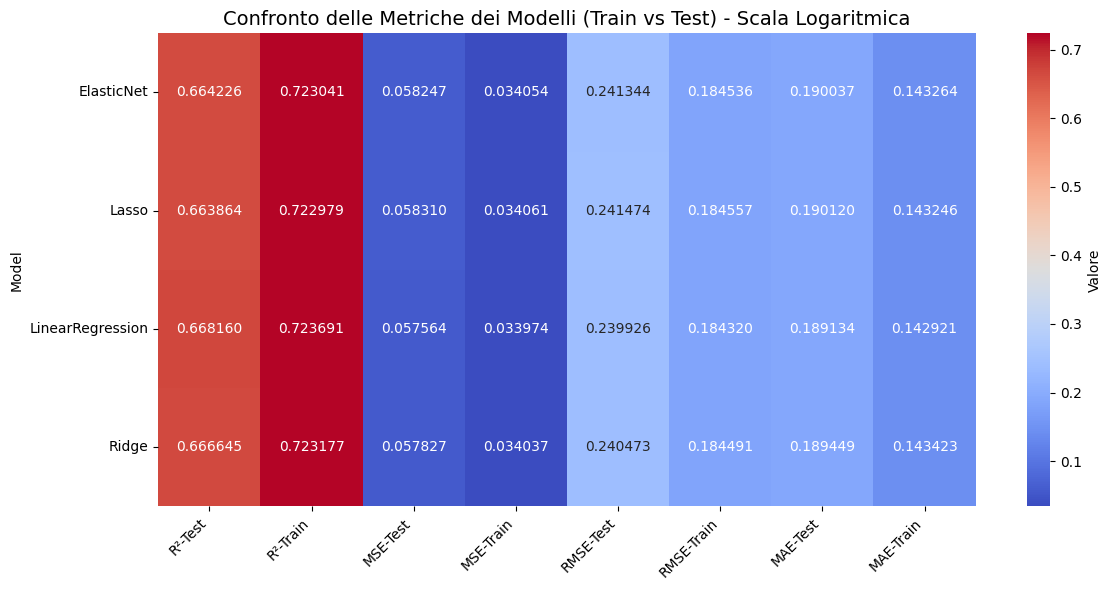

In [ ]:
#creiamo un dizionario con modelli implementati
models = {
    "LinearRegression": lr,
    "Ridge": ridge,
    "Lasso": lasso,
    "ElasticNet": elasticnet
}

#lista vuota per salvare i risultati
results = []

#valutiamo ogni modello su train e test set
for model_name, model in models.items():
    #valutazione su training set, salvate in un dizionario
    train_metrics = evaluate_model(model, (X_train_std, y_train))
    #aggiungiamo nuova chiave-valore per train set
    train_metrics["Set"] = "Train"
    #aggiungiamo dizionario train_metrics a lista results
    results.append(train_metrics)
    #valutazione sul test set, salvate in un dizionario
    test_metrics = evaluate_model(model, (X_test_std, y_test))
    #aggiungiamo nuova chiave-valore per test set
    test_metrics["Set"] = "Test"
    #aggiungiamo dizionario test_metrics a lista results
    results.append(test_metrics)

#creiamo dataframe dei risultati
results_df = pd.DataFrame(results)

#selezioniamo solo metriche su scala logaritmica per heatmap
log_metrics_df = results_df[["Model", "Set", "R² scala logaritmica", "MSE scala logaritmica", "RMSE scala logaritmica", "MAE scala logaritmica"]]

#rinominiamo le colonne
log_metrics_df.columns = ["Model", "Set", "R²", "MSE", "RMSE", "MAE"]

#trasformiamo dati in formato adatto per heatmap
pivot_df = log_metrics_df.pivot(index="Model", columns="Set", values=["R²", "MSE", "RMSE", "MAE"])

#miglioriamo leggibilità della heatmap
pivot_df.columns = [f"{metric}-{set_name}" for metric, set_name in pivot_df.columns]

#creiamo heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_df,
    annot=True,
    cmap="coolwarm",
    fmt=".6f",
    #linewidths=0.4,
    cbar_kws={"label": "Valore"}
)

# Titolo e miglioramenti visivi
plt.title("Confronto delle Metriche dei Modelli (Train vs Test) - Scala Logaritmica", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# <font color= "#84B19C">Cross-Validation </font>

Viene applicata una <font color= "#84B19C">**cross-validation**</font> per ottenere dei risultati più affidabili sulla robustezza e prestazioni dei quattro modelli implementati, cercando anche di migliorarne le performance complessive. La validazione incrociata permette di addestrare e testare i modelli su più sottoinsiemi di dati (fold), suddivisi a loro volta in training e test set, riducendo il rischio di overfitting e migliorando la capacità di generalizzazione. Poiché era già stata applicata una standardizzazione ai modelli, la cross-validation viene implementata manualmente con KFold, per poter applicare la standardizzazione solo al training set di ogni fold. L’errore viene valutato tramite Mean Squared Error (MSE) - come richiesto dal progetto - su scala logaritmica del target, per garantire coerenza con la trasformazione applicata ai dati nonché maggiore interpretabilità. Il codice nello specifico:

1. Riparte dalle variabili `X` (feature) e `y_log` (target in scala logaritmica).
2. Crea un dizionario contenente i modelli di regressione lineare implementati, con i parametri di regolarizzazione ottimizzati da `GridSearchCV` per Ridge, Lasso e Elastic Net.
3. Crea un'istanza di `KFold` con 5 suddivisioni casuali per la cross-validation (`cv=5`) e un `random_state=42` per garantire la riproducibilità della divisione.
4. Per ogni modello, per ogni fold i dati vengono suddivisi in training e test set, viene applicata la standardizzazione sul training set e trasformato il test set, addestrato il modello e calcolato l'MSE su scala logaritmica sia sul training che sul test set.
5. Salva i valori di MSE per ciascun fold all'interno di liste, calcolando media e deviazione standard per training e test set per ogni modello.
7. Converte i risultati in un DataFrame per poterli visualizzare.



I risultati della cross-validation sono i seguenti:
* <font color= "#84B19C">**Linear Regression**</font>:
> * Cross-validation: MSE (test set) = 0.043006, deviazione standard = 0.011145.
> * Senza cross-validation: MSE (test set) = 0.0576.

* <font color= "#84B19C">**Ridge Regression**</font>:
> *  Cross-validation: MSE (test set) = 0.042996, deviazione standard = 0.011141.
> * Senza cross-validation: MSE (test set) = 0.0578.

* <font color= "#84B19C">**Lasso Regression**</font>:
> * Cross-validation: MSE (test set) = 0.043028, deviazione standard = 0.011254.
> * Senza cross-validation: MSE (test set) = 0.0583.

* <font color= "#84B19C">**Elastic Net Regression**</font>:
> * Cross-validation: MSE (test set) = 0.043027, deviazione standard = 0.011240.
> * Senza cross-validation: MSE (test set) = 0.0582.


Dai risultati emergono le seguenti osservazioni:
* <font color= "#84B19C">**Riduzione dell'MSE con cross-validation**</font>
> La cross-validation riduce l'MSE per tutti i modelli, confermando una migliore generalizzazione rispetto ai risultati ottenuti senza cross-validation.
* <font color= "#84B19C">**Prestazioni comparabili tra i modelli**</font>
> I risultati sono simili per tutti i modelli, suggerendo prestazioni comparabili con buone capacità di generalizzazione.
* <font color= "#84B19C">**MSE simile tra training e test set**</font>
> I risultati sono simili tra training e test set per tutti i modelli, suggerendo l'assenza di un overfitting significativo.
* <font color= "#84B19C">**Devizione standard stabile**</font>
> I risultati per la deviazione standard sono basse per tutti i modelli, dimostrando che le performance sono stabili e consistenti tra le diverse suddivisioni dei dati.
* <font color= "#84B19C">**Impatto della regolarizzazione minimo**</font>
> I modelli regolarizzati (Ridge, Lasso, ElasticNet) mostrano prestazioni molto simili a Linear Regression, suggerendo che la regolarizzazione non ha un impatto significativo per questo dataset.
* <font color= "#84B19C">**Ridge Regression leggermente migliore**</font>
> I risultati per Ridge Regression mostrano il miglior MSE sul test set (0.042996), seguito da Linear Regression (0.043006), Elastic Net (0.043027), e Lasso (0.043028). Tuttavia, le differenze rimangono minime e i modelli possono definirsi comparabili.

In [ ]:
#ripartiamo dalle variabili X e y_log
X = housing_encoded.drop(["price", "price_log"], axis=1) #feature
y_log = housing_encoded["price_log"] #target logaritmico

#definiamo dizionario per 4 modelli
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0), #alpha ottimizzato da GridSearchCV
    "Lasso": Lasso(alpha=0.001), #alpha ottimizzato da GridSearchCV
    "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.9) #alpha e l1_ratio ottimizzati da GridSearchCV
}

#lista vuota per salvare i risultati
results = []

#creiamo istanza kfold con 5 batch per cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#ciclo sui modelli
for model_name, model in models.items():

  #liste vuote per salvare risultati per training e test per ogni batch
  train_scores = []
  test_scores = []

  #ciclo su ogni batch
  for train_index, test_index in kf.split(X):
    #dati di training e test
    X_train_batch, X_test_batch = X.iloc[train_index], X.iloc[test_index]
    y_train_batch, y_test_batch = y_log.iloc[train_index], y_log.iloc[test_index]

    #standardizzazione solo su training set
    ss = StandardScaler()
    X_train_batch = ss.fit_transform(X_train_batch)
    X_test_batch = ss.transform(X_test_batch)

    #addestramento
    model.fit(X_train_batch, y_train_batch)

    #calcoliamo previsioni per training e test set
    y_train_pred_log = model.predict(X_train_batch)
    y_test_pred_log = model.predict(X_test_batch)

    #calcoliamo MSE per training e test set
    mse_train_log = mean_squared_error(y_train_batch, y_train_pred_log)
    mse_test_log = mean_squared_error(y_test_batch, y_test_pred_log)

    #aggiungiamo valori ottenuti alle liste
    train_scores.append(mse_train_log)
    test_scores.append(mse_test_log)

  #salviamo risultati per il modello corrente
  results.append({
      "Model": model_name,
      "Mean Train MSE": np.mean(train_scores),
      "Std Train MSE": np.std(train_scores),
      "Mean Test MSE": np.mean(test_scores),
      "Std Test MSE": np.std(test_scores)
  })

#convertiamo risultati in un dataframe
results_df = pd.DataFrame(results)
print("Risultati della Cross-Validation:")
print(results_df)

Risultati della Cross-Validation:
              Model  Mean Train MSE  Std Train MSE  Mean Test MSE  \
0  LinearRegression        0.039875       0.002667       0.043006   
1             Ridge        0.039877       0.002667       0.042996   
2             Lasso        0.039932       0.002663       0.043028   
3        ElasticNet        0.039924       0.002664       0.043027   

   Std Test MSE  
0      0.011145  
1      0.011141  
2      0.011254  
3      0.011240  


## <font color= "#84B19C">Visualizzazione delle performance per cross-validation (MSE) </font>

Per visualizzare graficamente le prestazioni ottenute con la <font color= "#84B19C">**cross-validation**</font>, viene generata una <font color= "#84B19C">**heatmap**</font> che rappresenta i valori medi di MSE per il training e il test set di ciascun modello. Questa visualizzazione permette di individuare facilmente le differenze nelle prestazioni dei modelli grazie alle variazioni cromatiche. Il codice nello specifico:
1. Imposta le dimensioni della figura con il metodo `figure()`.
2. Utilizza il metodo `heatmap()` di Seaborn per creare una mappa di colori basata sui valori medi di MSE per training e test set.
3. Mostra i valori numerici direttamente sulla heatmap con `annot=True`, per facilitare l'interpretazione.
4. Applica la palette di colori `cmap="coolwarm"`, dove il blu rappresenta valori più bassi e il rosso quelli più alti.
5. Formatta i valori con sei cifre decimali con `fmt=".6f"` per evidenziare le differenze anche minime tra i modelli.
6. Aggiunge una barra dei colori con `cbar_kws={"label": 'MSE'}` per evidenziare la scala dei valori.
7. Aggiunge titoli ed etichette per facilitare l'interpretazione.
8. Mostra la heatmap risultante.

Dalla heatmap si osservano delle differenze minime tra i quattro modelli, con valori di MSE molto simili tra i modelli e tra training e test set di ciascun modello. Le variazioni cromatiche sono poco marcate, confermando prestazioni comparabili. <font color= "#84B19C">**Ridge Regression**</font> mostra il valore di MSE più basso sul test set, risultando leggermente migliore, sebbene le differenze siano trascurabili.

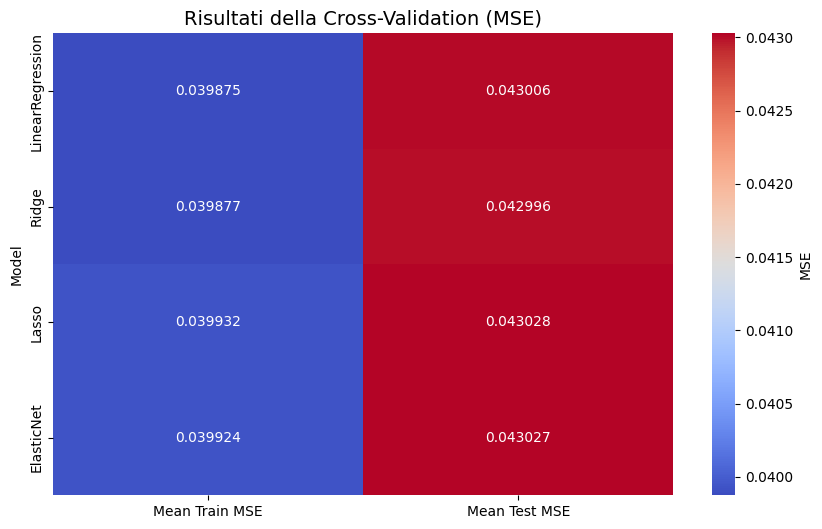

In [ ]:
#visualizziamo risultati della cross-validation con una heatmap
#impostiamo dimensioni figura
plt.figure(figsize=(10, 6))
sns.heatmap(
    results_df.set_index("Model")[["Mean Train MSE", "Mean Test MSE"]],
    annot=True,
    cmap="coolwarm",
    fmt=".6f",
    cbar_kws={"label": 'MSE'}
    #linewidths=0.5,
)
plt.title("Risultati della Cross-Validation (MSE)", fontsize=14)
plt.show()

#<font color= "#84B19C">Confronto della Complessità dei Modelli</font>

Dopo la cross-validation, viene confrontata la complessità dei modelli analizzando il numero di <font color= "#84B19C">**coefficienti non nulli**</font> nei quattro modelli implementati (Linear Regression, Ridge, Lasso, Elastic Net). I coefficienti rappresentano il peso di ciascuna variabile indipendente sul target, indicando il loro impatto sulle previsioni. Quest'analisi risulta particolarmente utile nei modelli con regolarizzazione Lasso e Elastic Net, che applicano penalizzazioni ai coefficienti, eliminando quelli meno rilevanti e riducendo la complessità del modello. I coefficienti non nulli possono essere interpretati nel modo seguente:
> Meno coefficienti non nulli → Modello più semplice, utilizza meno feature.<br>
> Più coefficienti non nulli → Modello più complesso, utilizza più feature.

Modelli come Linear Regression e Ridge mantengono tutti i coefficienti, aumentando la complessità del modello e l'eventuale rischio di overfitting. Modelli come Lasso e Elastic Net selezionano automaticamente le feature più rilevanti, riducendo la complessità del modello. Il codice nello specifico:
1. Definisce un dizionario con i quattro modelli implementati (`Linear Regression`, `Ridge`, `Lasso`, `Elastic Net`).
2. Crea un dizionario per salvare i risultati.
3. Itera su ciascun modello per ottenere i coefficienti non nulli, calcolando il numero totale di coefficienti, quali sono diversi da zero, e la percentuale.
4. Stampa i risultati per ciascun modello per il numero di coefficienti non nulli e la percentuale.
5. Ottiene il nome di ciascuna colonna dal DataFrame escludendo il target, per associare i coefficienti alle feature usate nel training.
6. Stampa per ciascuna feature il suo coefficiente rispetto al target.

Dai risultati dell'analisi, <font color= "#84B19C">**Linear Regression e Ridge mantengono tutti i coefficienti non nulli (100%)**</font>, utilizzando tutte le 15 feature. <font color= "#84B19C">**Lasso e Elastic Net riducono il numero di coefficienti non nulli a 12 su 15 (80%)**</font>, eliminando alcune feature meno rilevanti.

Le feature mantenute da Lasso e Elastic Net includono:

* bedrooms
* bathrooms
* stories
* mainroad
* guestroom
* basement
* hotwaterheating
* airconditioning
* parking
* prefarea
* furnishingstatus_0
* area_log

Le feature rimosse da Lasso e Elastic Net includono:

* area
* furnishingstatus_1
* furnishingstatus_2

Come elemento interessante viene osservato che, mentre la variabile area viene eliminata, la sua trasformazione logaritmica viene mantenuta con un coefficiente di circa 0.31. Questo suggerisce che il logaritmo dell'area (area_log) ha un impatto più significativo sul target (price_log) rispetto alla variabile area non trasformata. Inoltre, l'eliminazione di furnishingstatus_1 e furnishingstatus_2 suggerisce che alcuni stati di arredamento hanno un impatto meno significativo sul prezzo rispetto ad altre variabili.

Questa selezione automatica delle feature complessivamente conferma che Lasso e Elastic Net aiutano nella selezione delle feature, riducendo leggermente la complessità rispetto a Linear Regression e Ridge, ma con un impatto limitato. La riduzione da 15 a 12 coefficienti non nulli suggerisce che quasi la totalità delle feature risultano rilevanti per le previsioni su questo dataset e che l'effetto della regolarizzazione rimane limitato, in linea con i risultati ottenuti nelle sezioni precedenti.

In [ ]:
#definiamo i modelli
models = {
    "LinearRegression": lr,
    "Ridge": grid_ridge.best_estimator_,
    "Lasso": grid_lasso.best_estimator_,
    "ElasticNet": grid_enet.best_estimator_
}

#creiamo dizionario per salvare risultati
results = {
    "Model": [],
    "Non Zero Coefficients": [],
    "Non Zero Coefficients %": []
}

#troviamo coefficienti non nulli per ogni modello
for model_name, model in models.items():

  #otteniamo coefficienti totali
  coefficients = model.coef_
  total_coef = len(coefficients)

  #contiamo coefficienti non nulli in numero e in %
  non_zero_coef = np.sum(coefficients != 0)
  percentage_non_zero = (non_zero_coef / total_coef) * 100

  #aggiungiamo risultati al dizionario
  results["Model"].append(model_name)
  results["Non Zero Coefficients"].append(non_zero_coef)
  results["Non Zero Coefficients %"].append(percentage_non_zero)

  #stampiamo i risultati per coefficienti non nulli
  print(f"{model_name}:")
  print(f"- Numero di coefficienti non nulli: {non_zero_coef}/{total_coef}")
  print(f"- Percentuale di coefficienti non nulli: {percentage_non_zero:.2f}%")

  print("\nCoefficienti non nulli:")

  #ottieniamo nomi delle colonne dal dataframe escludendo target
  feature_names = X.columns.tolist()
  for i, coef in enumerate(coefficients):
    if coef != 0:
     print(f"{feature_names[i]}: {coef:.6f}")

  print("\n===================================================\n")

LinearRegression:
- Numero di coefficienti non nulli: 15/15
- Percentuale di coefficienti non nulli: 100.00%

Coefficienti non nulli:
area: -0.024999
bedrooms: 0.016939
bathrooms: 0.087288
stories: 0.071045
mainroad: 0.082206
guestroom: 0.040804
basement: 0.120054
hotwaterheating: 0.115816
airconditioning: 0.124000
parking: 0.037257
prefarea: 0.108906
furnishingstatus_0: -0.074037
furnishingstatus_1: 0.038603
furnishingstatus_2: 0.035434
area_log: 0.379216


Ridge:
- Numero di coefficienti non nulli: 15/15
- Percentuale di coefficienti non nulli: 100.00%

Coefficienti non nulli:
area: 0.003680
bedrooms: 0.017130
bathrooms: 0.087134
stories: 0.071368
mainroad: 0.086321
guestroom: 0.044819
basement: 0.118439
hotwaterheating: 0.108321
airconditioning: 0.124643
parking: 0.038241
prefarea: 0.106248
furnishingstatus_0: -0.073651
furnishingstatus_1: 0.037656
furnishingstatus_2: 0.035995
area_log: 0.301082


Lasso:
- Numero di coefficienti non nulli: 12/15
- Percentuale di coefficienti non nul

## <font color= "#84B19C">Visualizzazione del confronto complessità dei modelli </font>

Per visualizzare graficamente il confronto sulla <font color= "#84B19C">**complessità dei modelli**</font>, viene generata una <font color= "#84B19C">**heatmap**</font> che rappresenta il numero e la percentuale dei coefficienti non nulli per ciascun modello. Questa visualizzazione permette di comprendere facilmente l'effetto della regolarizzazione sulla selezione delle features. Il codice nello specifico:

1. Converte i risultati dal dizionario a un DataFrame.
2. Imposta l'indice del DataFrame con `set_index("Model", inplace=True)`.
3. Imposta le dimensioni della figura con il metodo `figure()`.
4. Utilizza il metodo `heatmap()` di Seaborn per creare una mappa di colori basata sul numero e percentuale di coefficienti non nulli.
5. Mostra i valori numerici direttamente sulla heatmap con `annot=True`, per facilitare l'interpretazione.
6. Applica la palette di colori `cmap="coolwarm"`, dove il blu rappresenta valori più bassi (meno coefficienti) e il rosso quelli più alti (più coefficienti).
7. Aggiunge una barra dei colori con `cbar_kws={'label': 'Valore'}` per evidenziare la scala dei valori.
8. Aggiunge titoli ed etichette per facilitare l'interpretazione.
9. Mostra la heatmap risultante.

Dalla heatmap si osserva che Linear Regression e Ridge mantengono tutti i 15 coefficienti (100%), non effettuando alcuna selezione delle features. Questo è coerente con l'analisi della sezione precedente. Lasso e ElasticNet mostrano invece solo 12 coefficienti non nulli su 15 (80%), evidenziando l'effetto della regolarizzazione L1 che comporta una selezione delle feature. Questi modelli hanno effettivamente eliminato 3 features, rendendoli leggermente meno complessi. Questa differenza è visibile dalle variazioni cromatiche della heatmap, con le celle blu che rappresentano il numero di coefficienti non nulli e le celle rosse che rappresentano le percentuali.

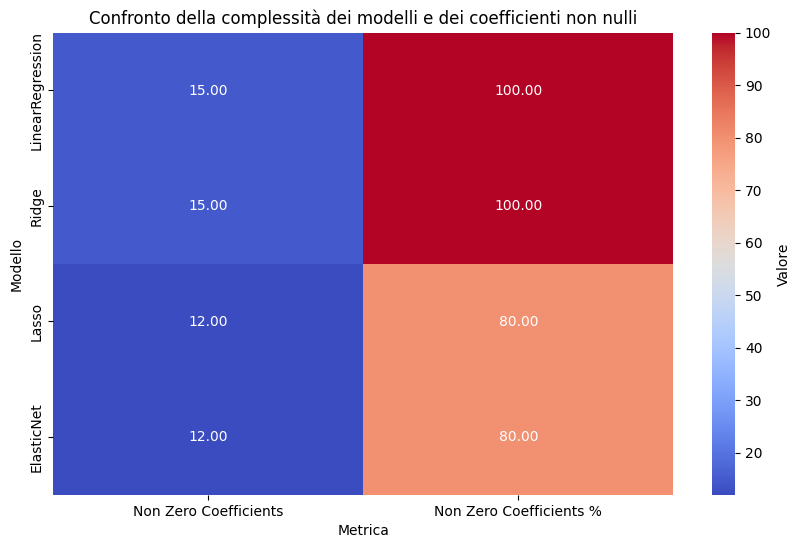

In [ ]:
#convertiamo dizionario in un dataframe
results_df = pd.DataFrame(results)

#impostiamo come indice Model
results_df.set_index("Model", inplace=True)

#creiamo la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Valore'}) #cmap="YlGnBu"
plt.title("Confronto della complessità dei modelli e dei coefficienti non nulli")
plt.xlabel("Metrica")
plt.ylabel("Modello")
plt.show()

#<font color= "#84B19C">Distribuzione dei residui </font>

Dopo la valutazione dei coefficienti non nulli, viene analizzata la <font color= "#84B19C">**distribuzione dei residui**</font> per valutare la qualità delle previsioni dei quattro modelli. I residui rappresentano la differenza tra i valori reali (`y_test`) e quelli previsti dal modello (`y_pred`), permettendo di individuare eventuali errori e il loro andamento. Il codice nello specifico:
1. Definisce un dizionario per salvare i residui di ciascun modello.
2. Imposta le dimensioni della figura con il metodo `figure()`.
3. Itera su ciascun modello, calcolando le previsioni (`y_pred`) e i residui come la differenza tra valori reali e valori previsti, salvandoli nel dizionario.
4. Utilizza il metodo `subplot()` per generare un subplot per ogni modello corrente.
5. Utilizza il metodo `scatterplot()` di Seaborn per generare un grafico a dispersone con i valori previsti sull'asse x e i residui sull'asse y.
6. Aggiunge una linea rossa tratteggiata a y=0 per evidenziare la distribuzione dei residui rispetto ai valori previsti.
7. Aggiunge titoli ed etichette per facilitare l'interpretazione.
8. Evita sovrapposizioni tra i grafici con il metodo `tight_layout()`.
9. Mostra gli scatterplot risultanti.

Dall'analisi della distribuzione dei residui si osservano differenze significative tra i modelli:
* <font color= "#84B19C">**LinearRegression e Ridge**</font> mostrano pattern sistematici nei residui, con una chiara tendenza lineare decrescente. Tuttavia, operano su scale completamente diverse: Linear Regression presenta valori predetti negativi con residui positivi (0 a 300), mentre Ridge mostra valori predetti positivi con residui negativi (0 a -50). Questa differenza nelle scale, nonostante entrambi utilizzino gli stessi dati di training, potrebbe suggerire che Ridge sta trasformando diversamente lo spazio delle predizioni grazie alla regolarizzazione L2.
* <font color= "#84B19C">**Lasso e Elastic Net**</font> mostrano residui distribuiti in un intervallo molto più ristretto (-1.0 e 0.2) rispetto agli altri due modelli. I loro grafici sono molto simili, dimostrando che le due regolarizzazioni stanno producendo modelli molto simili. La distribuzione dei residui è più dispersa intorno allo zero.

Questa differenza nella distribuzione dei residui tra i quattro modelli non indica necessariamente una differenza di accuratezza, ma potrebbe suggerire che i modelli con regolarizzazione L1 (Lasso e Elastic Net) lavorano su una scala di predizione diversa a causa dell'eliminazione di alcune variabili, producendo comunque errori maggiori rispetto ai modelli che utilizzano tutte le features (sulla base delle valutazioni precedenti).

Comunque, questa analisi dei residui suggerisce che tutti i modelli potrebbero beneficiare di ulteriori miglioramenti o specificazioni per catturare meglio le relazioni tra i dati.

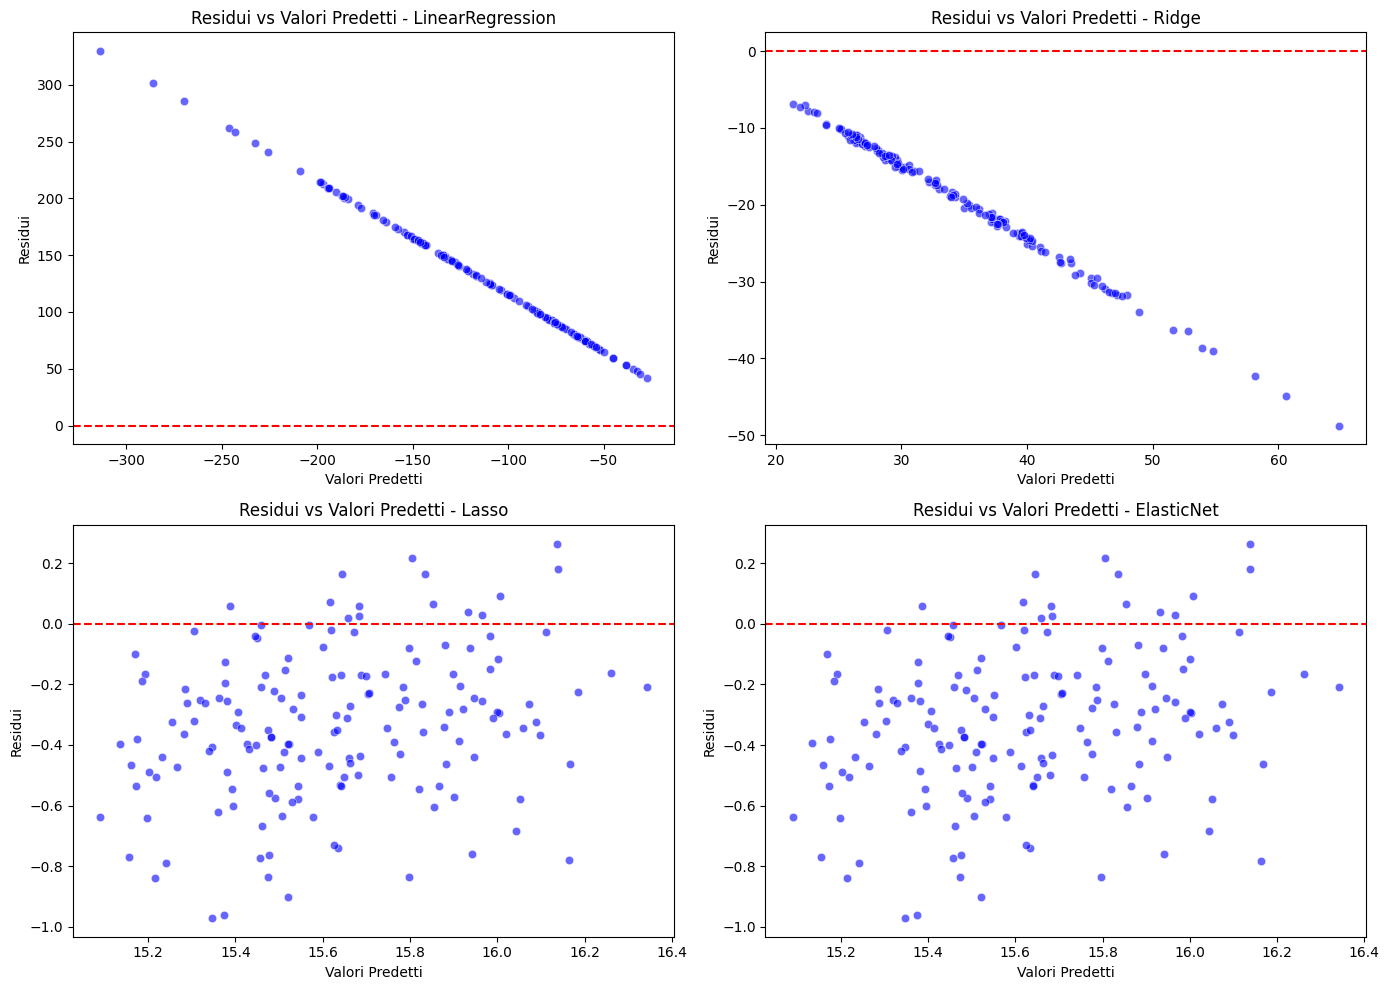

In [ ]:
#dizionario per salvare residui
residuals = {}

#creiamo figura con subplot per ogni modello
plt.figure(figsize=(14, 10))

#calcoliamo i residui per ogni modello
for i, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    #convertiamo y_test e y_pred in array numpy per evitare problemi
    residuals[model_name] = np.array(y_test) - np.array(y_pred)

    #creiamo un subplot per ogni modello
    plt.subplot(2, 2, i + 1) #organizziamo grafici in griglia 2x2
    sns.scatterplot(x=y_pred, y=residuals[model_name], color="blue", alpha=0.6)
    plt.axhline(y=0, color="red", linestyle="--") #linea orizzontale a y=0
    plt.title(f"Residui vs Valori Predetti - {model_name}")
    plt.xlabel("Valori Predetti")
    plt.ylabel("Residui")

#mostriamo la figura
plt.tight_layout()
plt.show()

#<font color= "#84B19C">Learning Curves </font>

Infine, dopo l'analisi dei residui, vengono generate le <font color= "#84B19C">**learning curves**</font> per valutare le prestazioni dei modelli al variare della dimensione del training set. Nello specifico le curve possono essere interpretate nel modo seguente:
> Curva blu → punteggio sul training set.<br>
> Curva arancione → punteggio sul test set.

I punteggi vengono calcolati con l'MSE negativo, quindi valori più vicini a zero indicano prestazioni migliori. Le learning curves aiutano a identificare fenomeni di overfitting (se il punteggio del training set è molto migliore di quello del test set) o underfitting (se entrambe le curve sono lontane da zero e non migliorano all'aumentare dei dati), analizzando come il modello apprende con quantità crescenti di dati. Il codice nello specifico:
1. Imposta il tema grafico con il metodo `set_theme()` di Seaborn per migliorare l'estetica della visualizzazione.
2. Imposta le dimensioni della figura con il metodo `figure()`.
3. Itera su ciascun modello, calcolando la rispettiva learning curve con il metodo `learning_curve()`, per ottenere i punteggi di training e test sul dataset.
4. Calcola la media dei punteggi di training e test su tutte le iterazioni della cross-validation.
5. Crea un grafico per ogni modello, mostrando le learning curves con il punteggio medio del training set e del test set in funzione della dimensione dei dati di training.
6. Aggiunge titoli ed etichette per facilitare l'interpretazione.
7. Evita sovrapposizioni tra i grafici con `tight_layout()`.
8. Mostra i grafici risultanti.

Dall'analisi delle learning curves emergono le seguenti osservazioni:
* <font color= "#84B19C">**Linear Regression**</font>
> Il modello mostra un aumento dell'errore sul training set, indicato dalla curva blu che scende all'aumentare della dimensione del dataset. Questo è un comportamento atteso in quanto con pochi dati il modello tende a memorizzare meglio i pattern. L'errore sul test set migliora progressivamente fino a circa 100 esempi, poi si stabilizza. Il gap tra training e test si riduce all'aumentare dei dati, suggerendo una buona generalizzazione.

* <font color= "#84B19C">**Ridge Regression**</font>
> Il comportamento delle curve è simile alla regressione lineare, ma con una curva di training più stabile grazie alla regolarizzazione. Anche qui l'errore sul test set migliora fino a circa 100 esempi, poi si stabilizza. La regolarizzazione Ridge suggerisce complessivamente prestazioni leggermente più stabili rispetto alla regressione lineare standard.

* <font color= "#84B19C">**Lasso Regression**</font>
> Il modello mostra una curva di training che si stabilizza rapidamente. Le prestazioni sul test set migliorano significativamente fino a 100 esempi, poi si stabilizzano. Il gap tra training e test rimane relativamente costante, suggerendo una buona generalizzazione.

* <font color= "#84B19C">**Elastic Net**</font>
> Il modello mostra un andamento molto simile a Lasso, con curve quasi identiche. Questo è un comportamento atteso in quanto utilizza al 90% la regolarizzazione Lasso.

In conclusione, tutti i modelli mostrano prestazioni simili all'aumentare della dimensione del training set, diminuendo correttamente l'errore sul test set all'aumentare dei dati. I modelli regolarizzati (Ridge, Lasso, Elastic Net) mostrano curve più stabili rispetto alla regressione lineare senza regolarizzazione, probabilmente perché riducono l’impatto di feature meno rilevanti.

Questa analisi evidenzia come la dimensione del dataset influenzi le prestazioni del modello e conferma che i modelli regolarizzati offrono dei vantaggi in termini di generalizzazione.

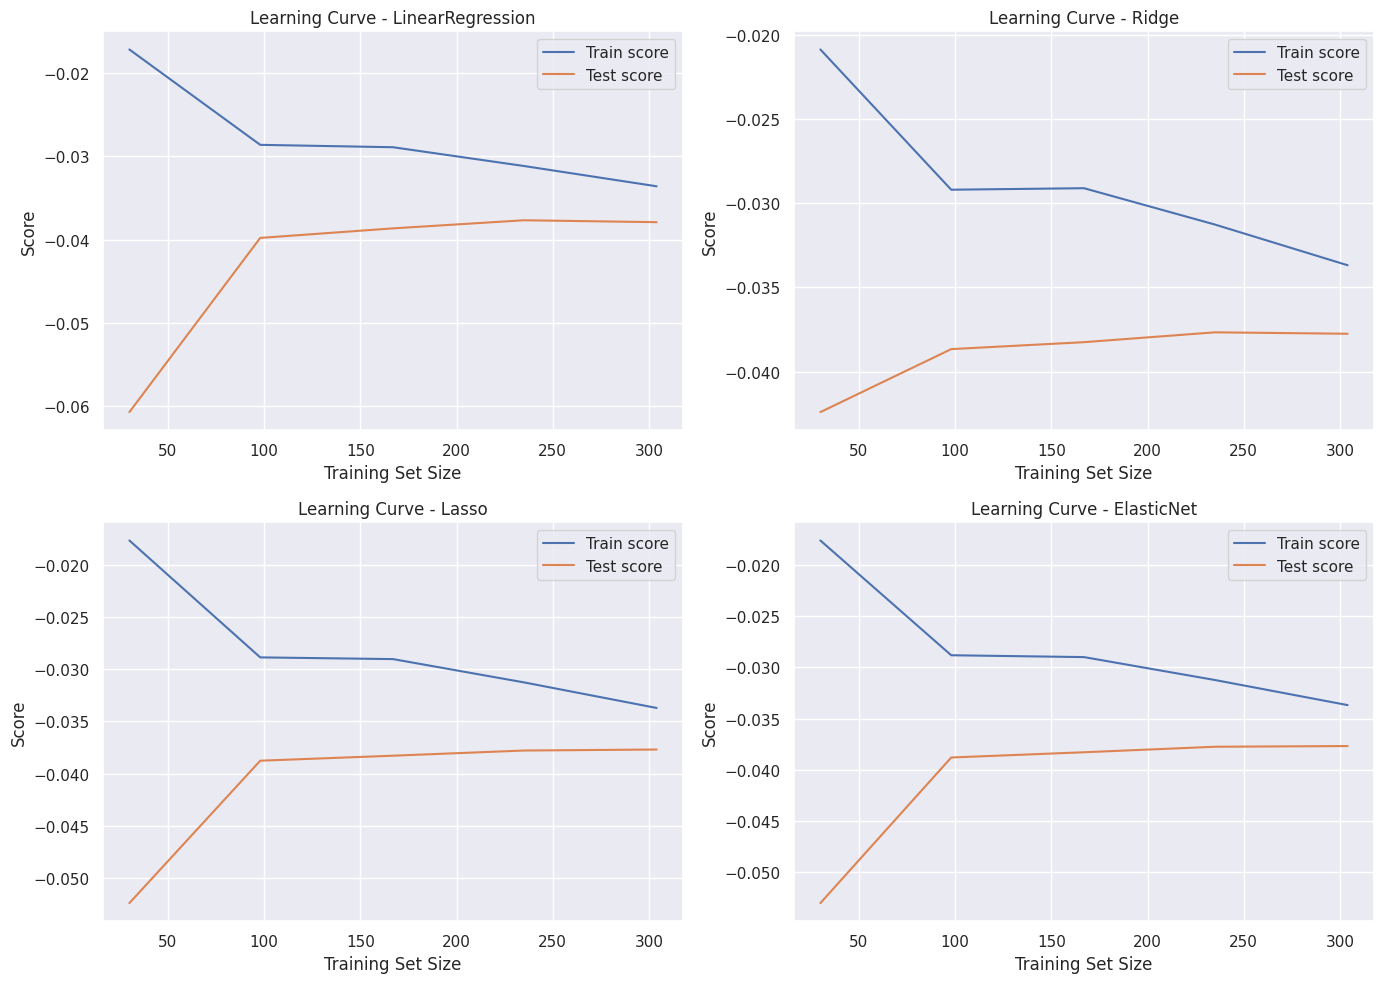

In [ ]:
#creiamo la Learning Curve per i 4 modelli
sns.set_theme()

#creiamo figura con subplot per ogni modello
plt.figure(figsize=(14, 10))

#iteriamo sui modelli e creiamo le learning curves
for i, (model_name, model) in enumerate(models.items(), 1):
    #calcoliamo learning curves
    train_sizes_abs, train_scores, test_scores = learning_curve(
        model, #modello corrente
        X_train_std, #dati di training standardizzati
        y_train, #target di training
        cv=5, #5 fold cross-validation
        scoring="neg_mean_squared_error", #metrica di valutazione MSE
        random_state=42 #seme per riproducibilità
    )

    #calcoliamo la media dei punteggi
    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)

    #creiamo il grafico per modello corrente
    plt.subplot(2, 2, i) #2 righe 2 colonne
    plt.plot(train_sizes_abs, train_scores_mean, label="Train score")
    plt.plot(train_sizes_abs, test_scores_mean, label="Test score")
    plt.title(f"Learning Curve - {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)

#evitiamo sovrapposizioni tra grafici
plt.tight_layout()
plt.show()